# Project Description (Census Income)

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

# Importing Required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')

In [3]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
df.shape

(32560, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

# There are no null values in the dataset.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
Fnlwgt,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
Education_num,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
Capital_gain,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
Capital_loss,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
Hours_per_week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


In [8]:
df['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

We can observe there are 2 classes in target variable.

# Seperating Categorical and Continuous variables.

In [9]:
#Checking for Categorical columns
Cat_col = []
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        Cat_col.append(i)
print(Cat_col)

['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


In [10]:
# Checking for Continous columns
num_col = []
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        num_col.append(i)
print(num_col)

['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']


# Exploratory Data Analysis

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64


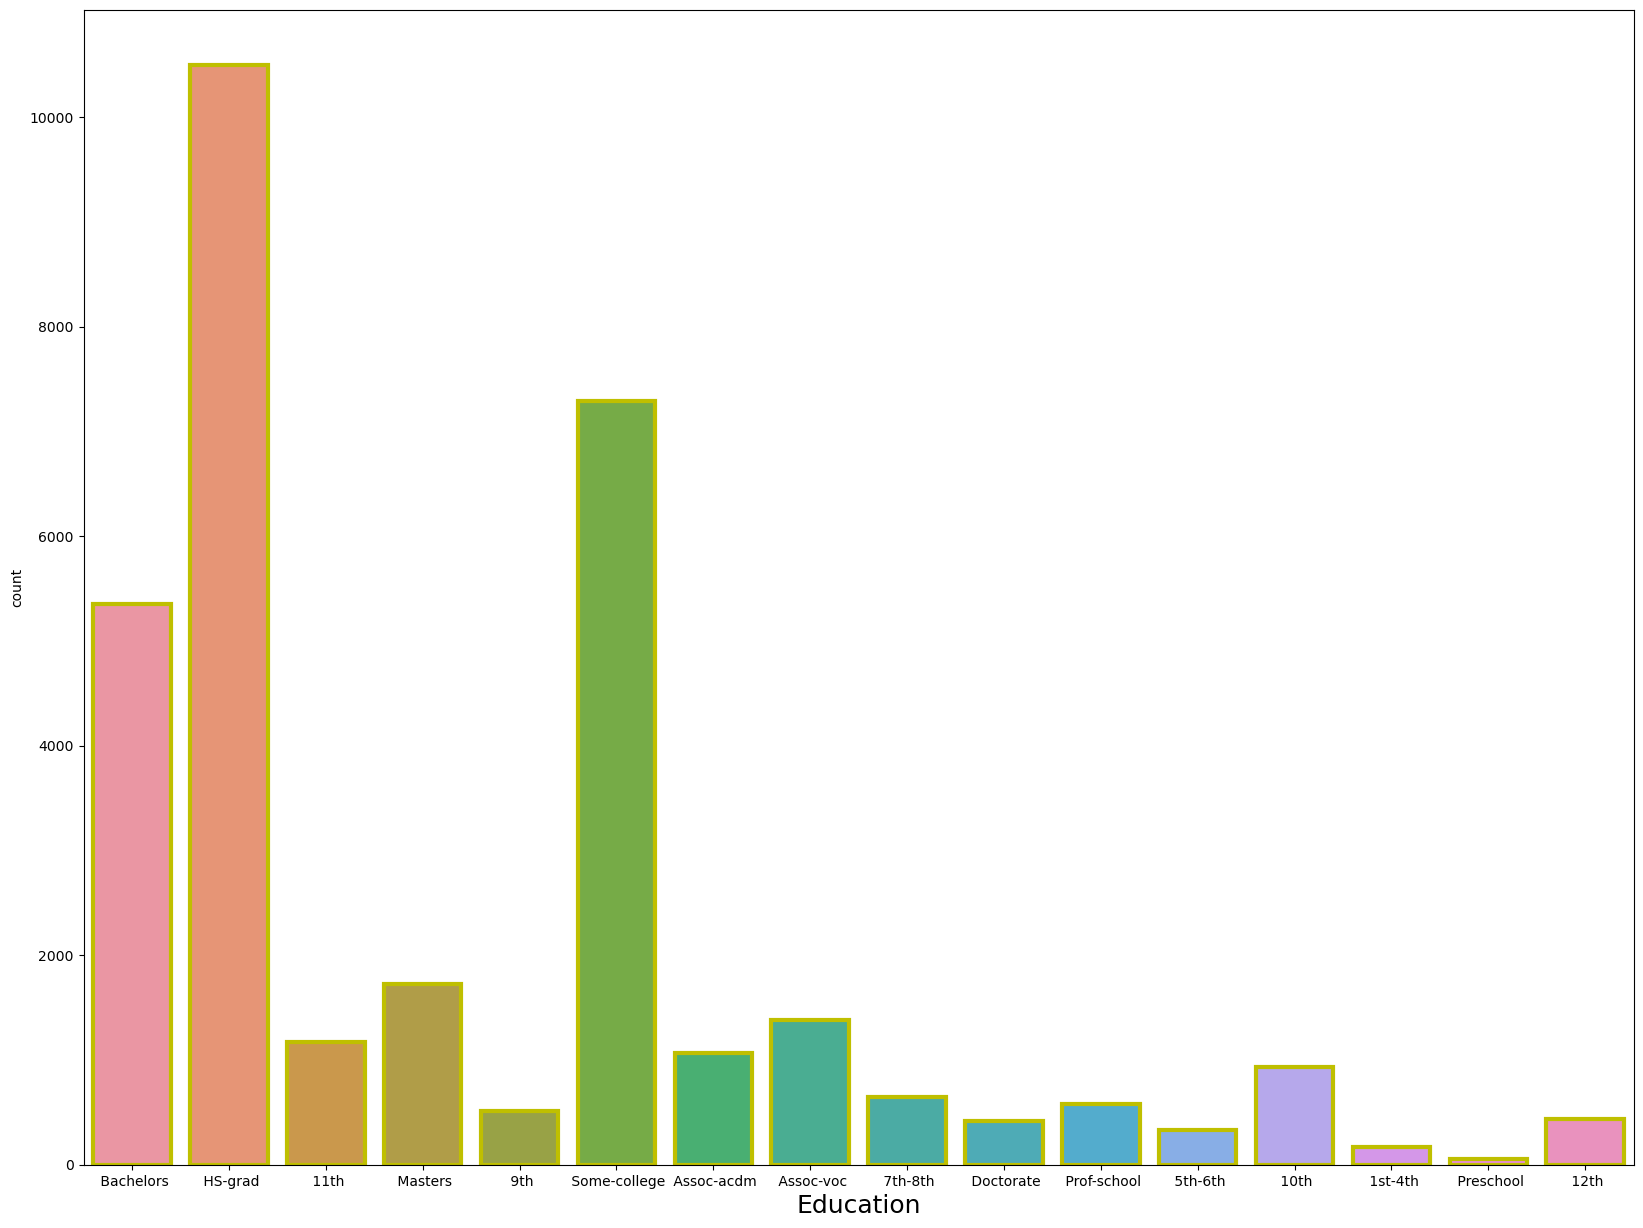

In [11]:
plt.figure(figsize=(20,15))
ax=sns.countplot(x='Education',data=df,edgecolor="y",linewidth=3)
plt.xlabel('Education',fontsize=18)
print(df['Education'].value_counts())

HS-graduates are more in number.

 Male      21789
 Female    10771
Name: Sex, dtype: int64


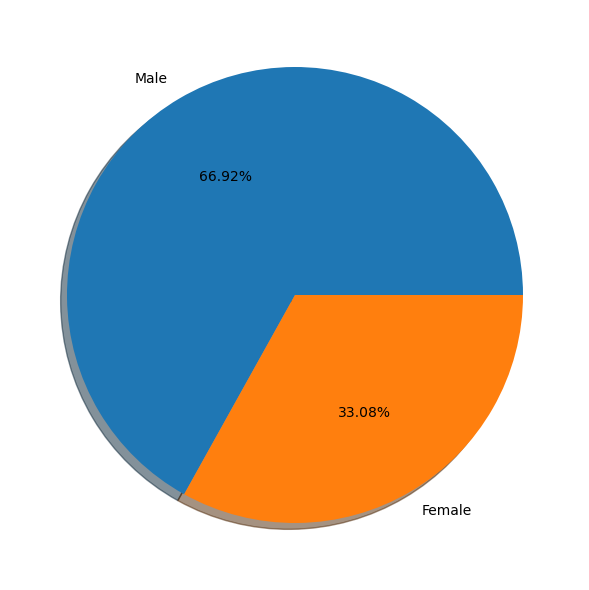

In [12]:
print(df['Sex'].value_counts())
labels='Male','Female'
fig,ax = plt.subplots(figsize=(10,6))
ax.pie(df['Sex'].value_counts(),labels=labels,autopct='%1.2f%%',shadow=True)
plt.tight_layout()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64


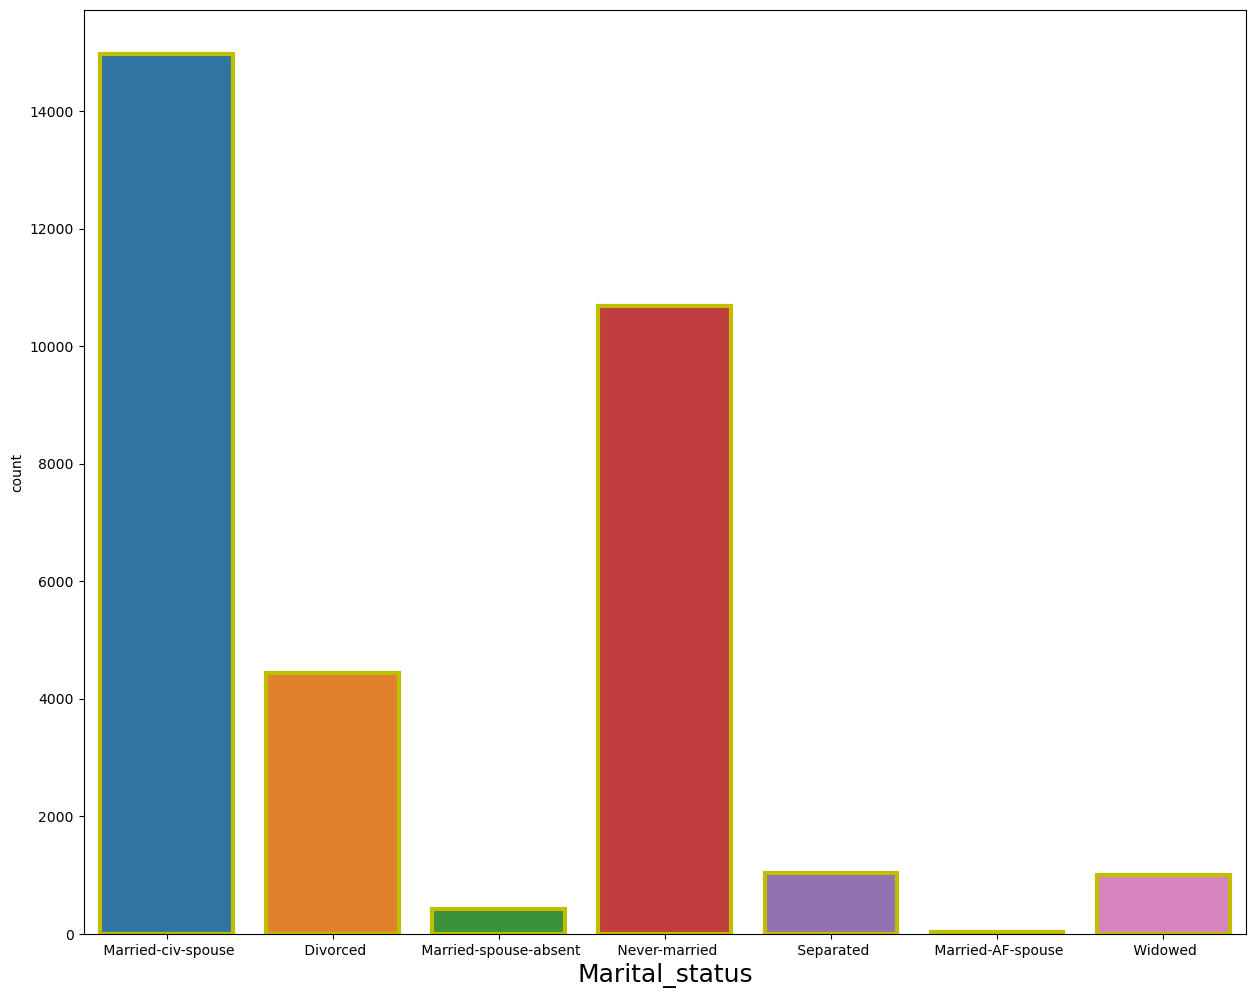

In [13]:
plt.figure(figsize=(15,12))
ax=sns.countplot(x='Marital_status',data=df,edgecolor="y",linewidth=3)
plt.xlabel('Marital_status',fontsize=18)
print(df['Marital_status'].value_counts())

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64


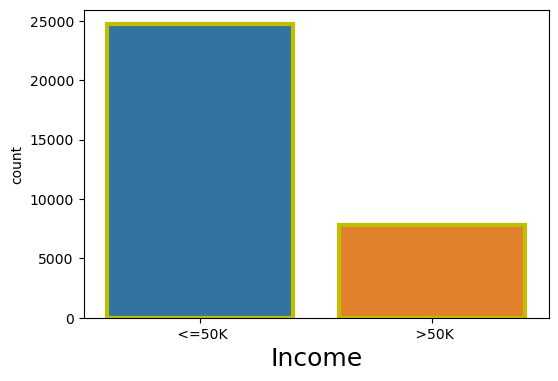

In [14]:
plt.figure(figsize=(6,4))
ax=sns.countplot(x='Income',data=df,edgecolor="y",linewidth=3)
plt.xlabel('Income',fontsize=18)
print(df['Income'].value_counts())

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


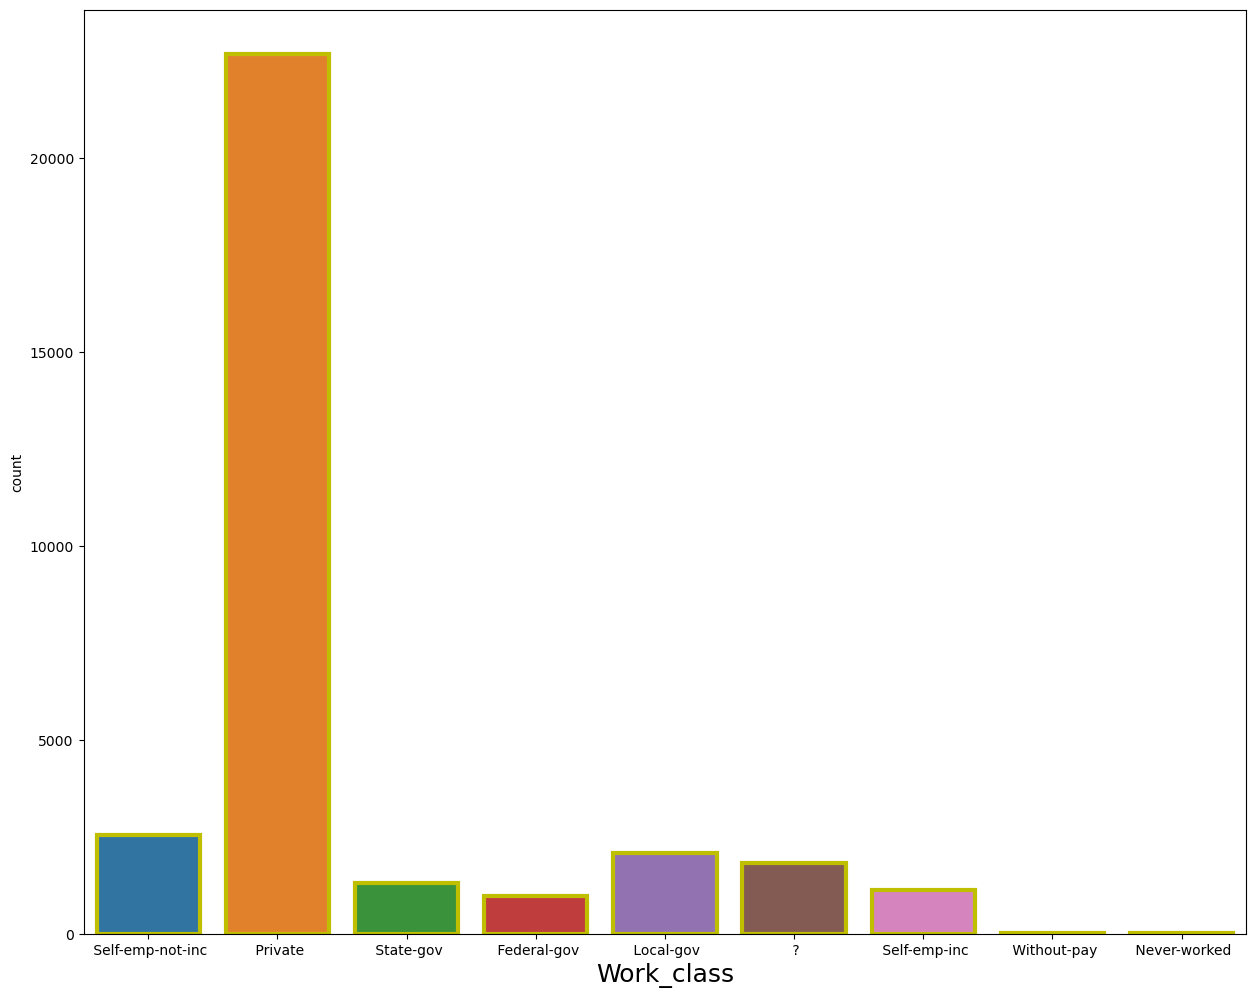

In [15]:
plt.figure(figsize=(15,12))
ax=sns.countplot(x='Workclass',data=df,edgecolor="y",linewidth=3)
plt.xlabel('Work_class',fontsize=18)
print(df['Workclass'].value_counts())

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64


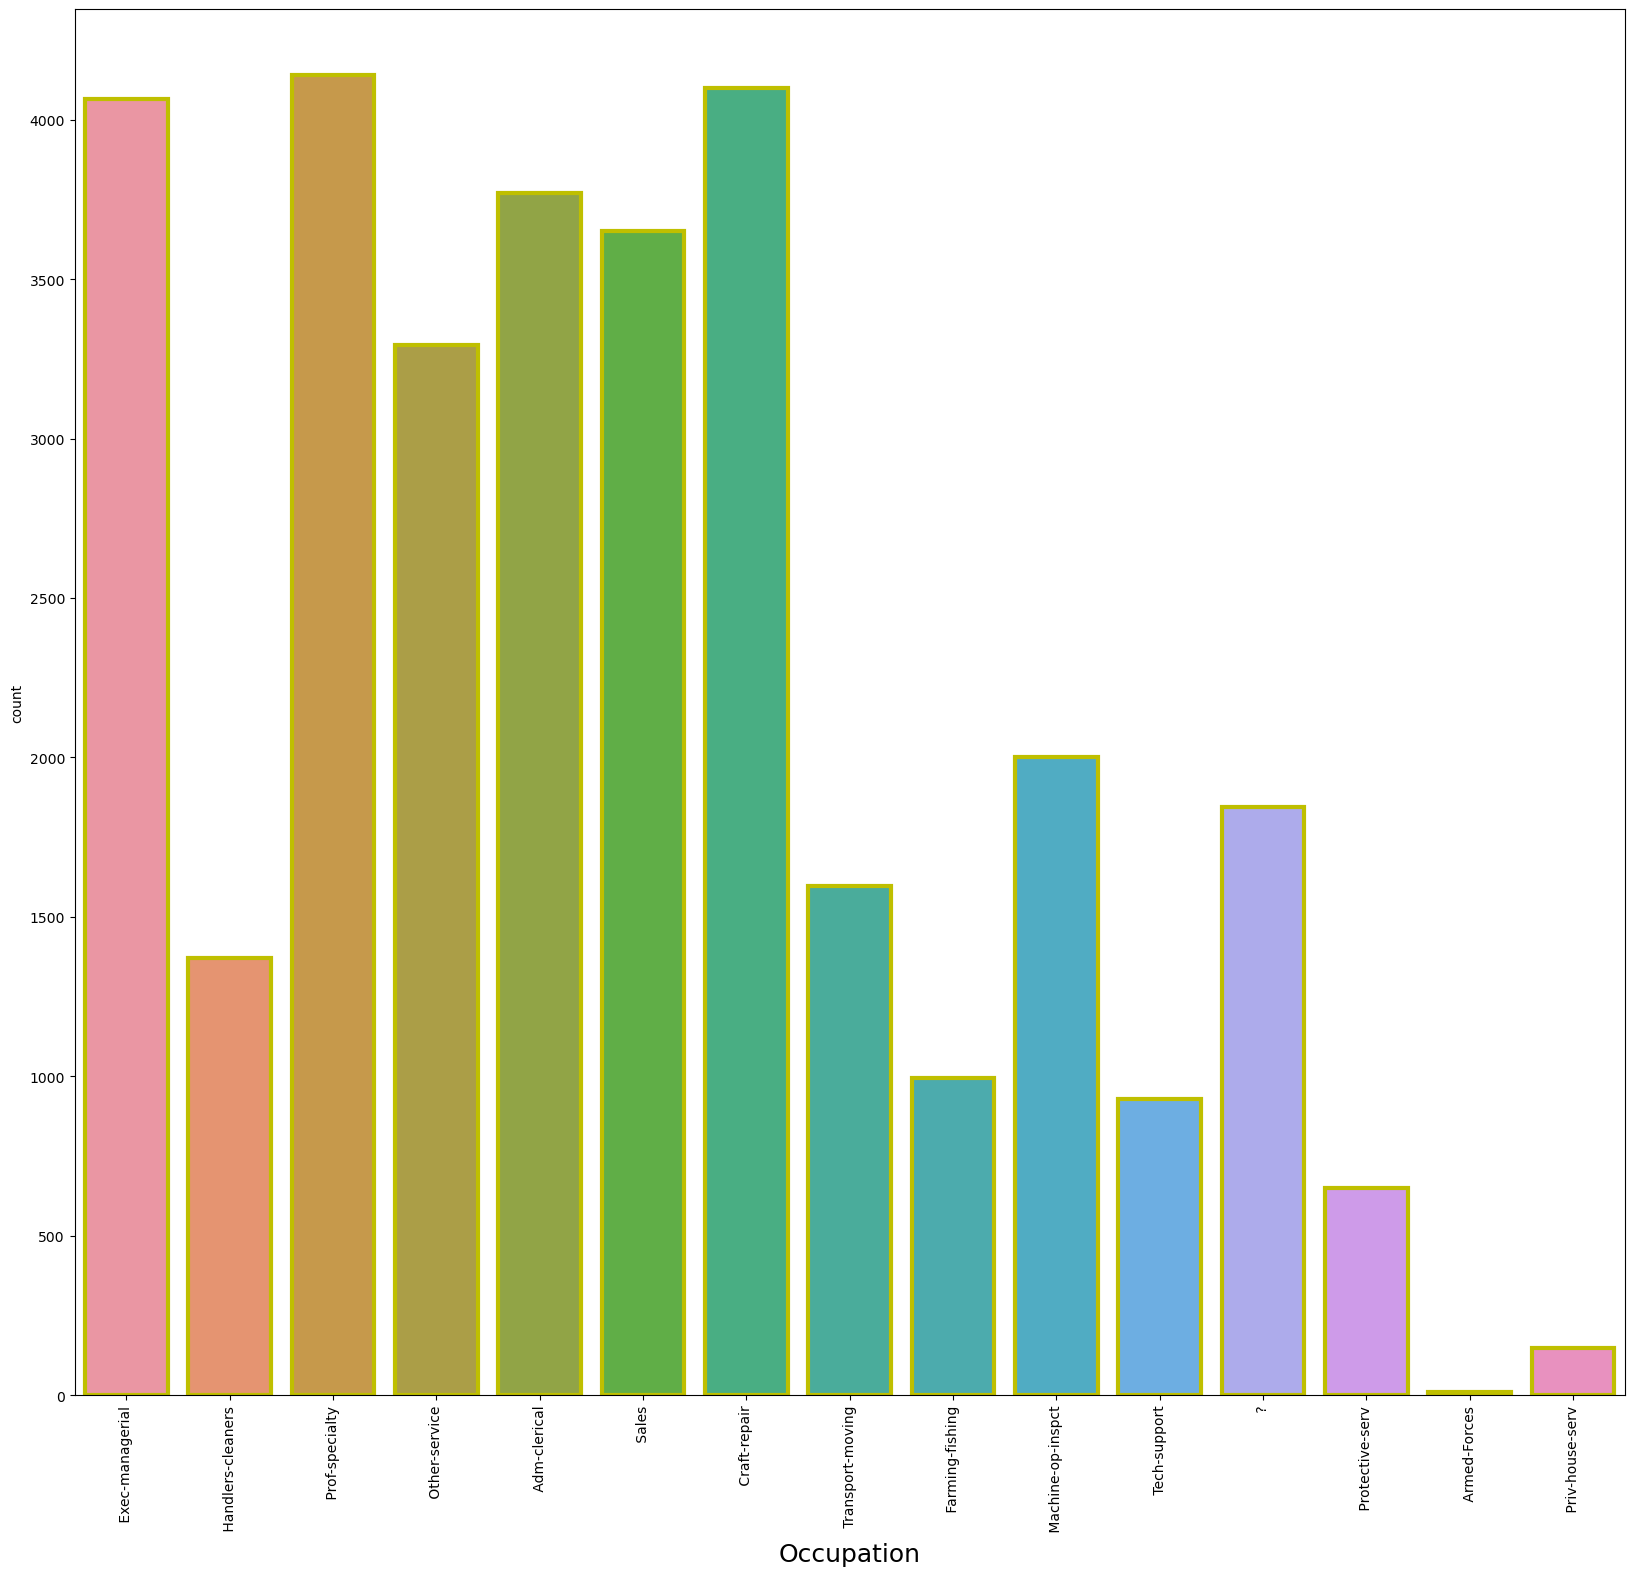

In [16]:
plt.figure(figsize=(20,18))
ax=sns.countplot(x='Occupation',data=df,edgecolor="y",linewidth=3)
plt.xlabel('Occupation',fontsize=18)
plt.xticks(rotation=90)
print(df['Occupation'].value_counts())

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64


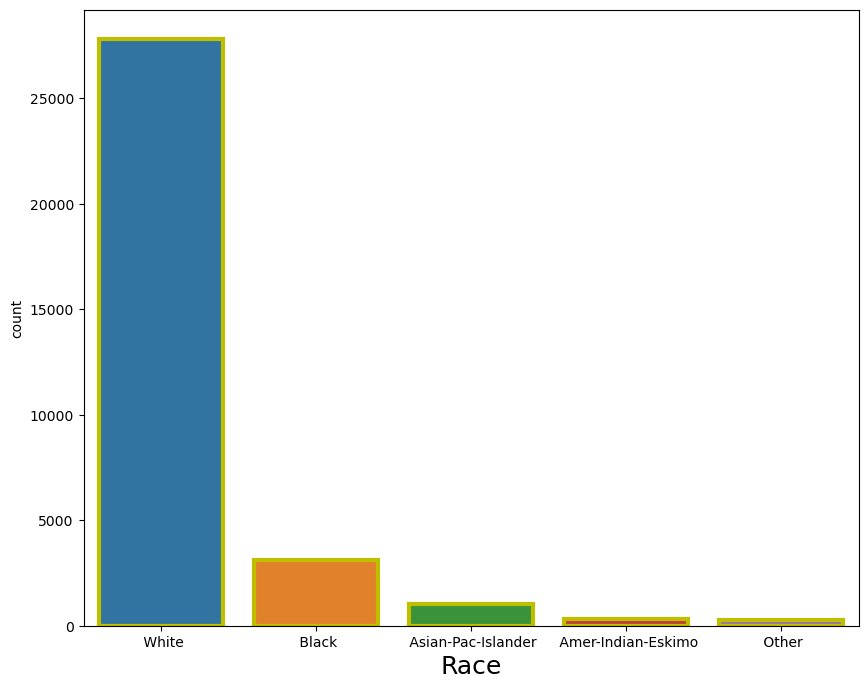

In [17]:
plt.figure(figsize=(10,8))
ax=sns.countplot(x='Race',data=df,edgecolor="y",linewidth=3)
plt.xlabel('Race',fontsize=18)
print(df['Race'].value_counts())

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64


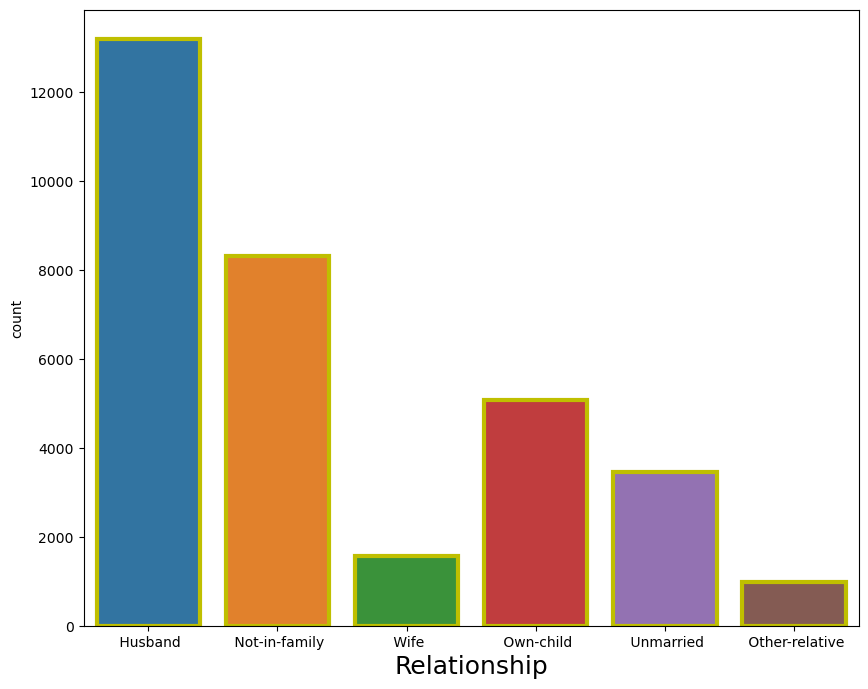

In [18]:
plt.figure(figsize=(10,8))
ax=sns.countplot(x='Relationship',data=df,edgecolor="y",linewidth=3)
plt.xlabel('Relationship',fontsize=18)
print(df['Relationship'].value_counts())

In [19]:
df_cont=df[num_col]

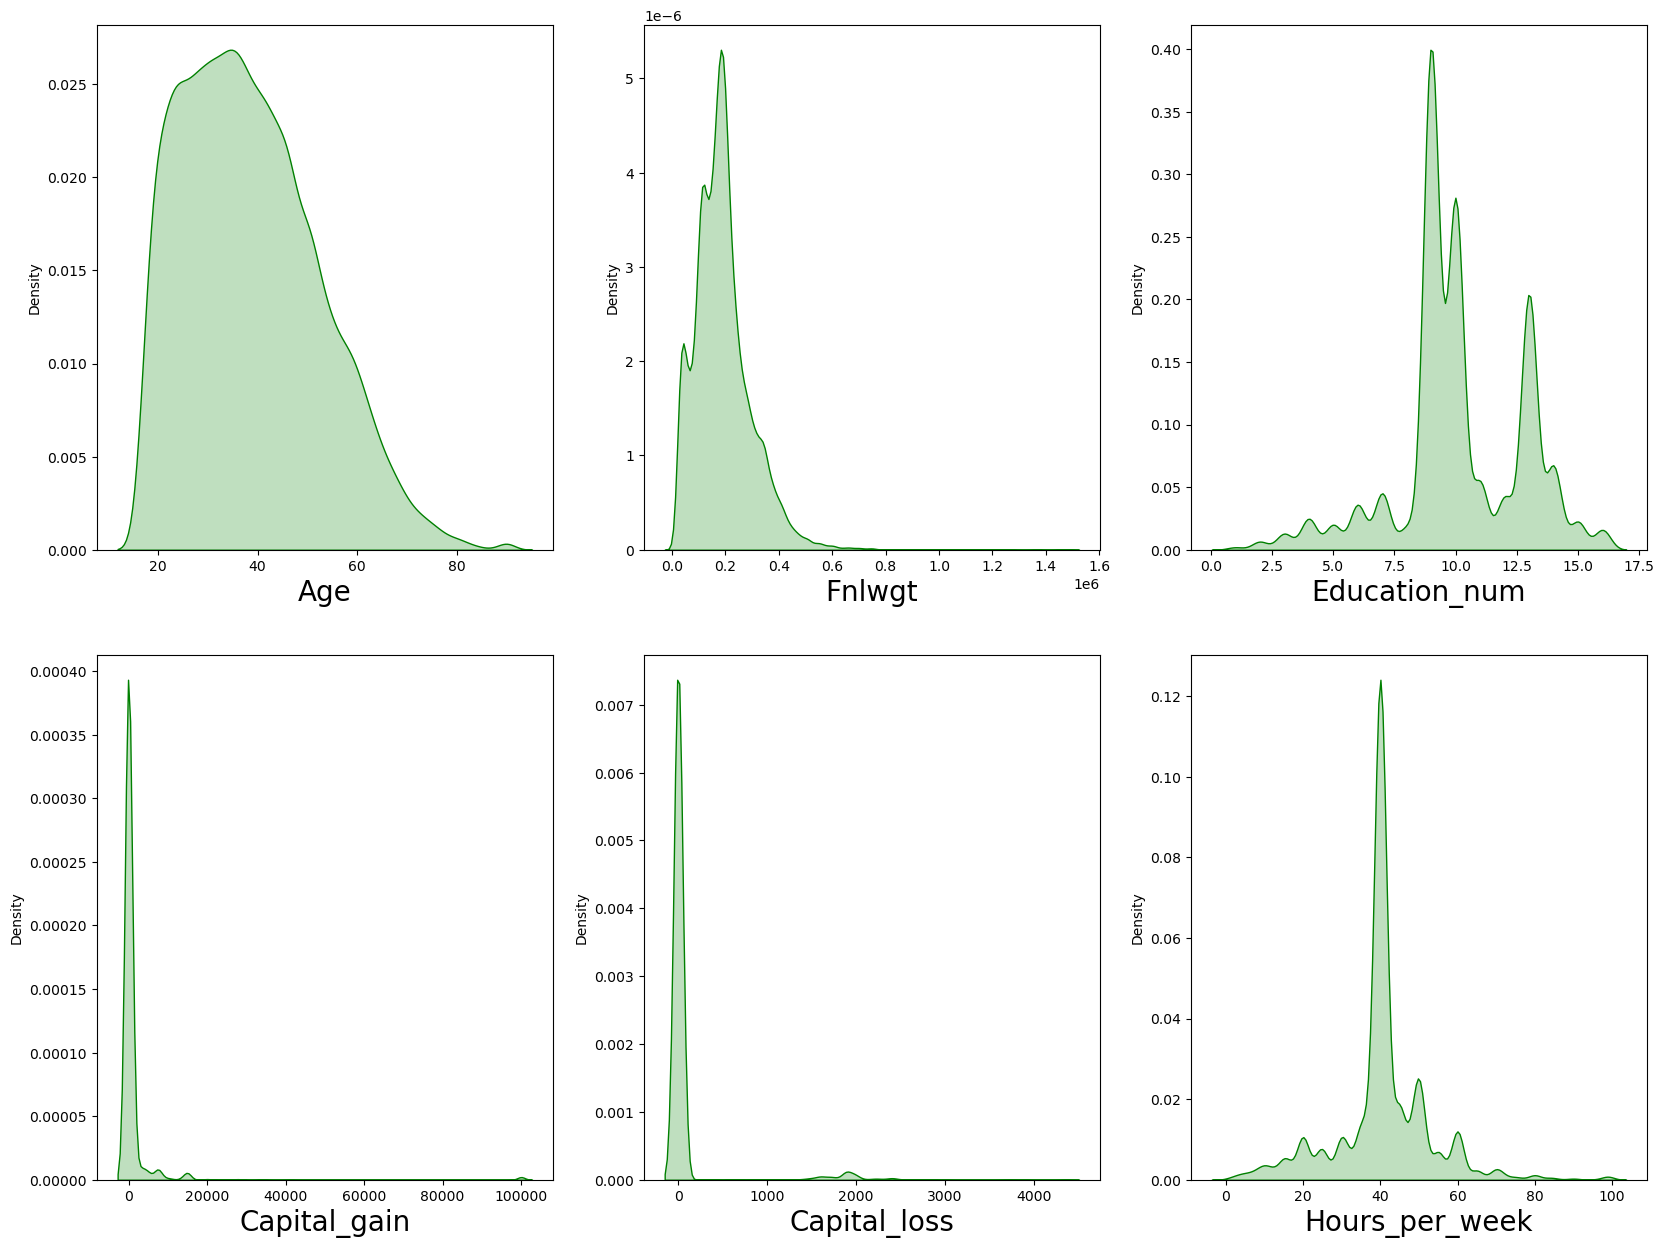

In [20]:
#Lets check the distribution of continous columns
plt.figure(figsize=(20,15), facecolor='white')
plotnumber = 1

for column in df_cont:
    if plotnumber<=6:
        ax = plt.subplot(2,3,plotnumber)
        sns.distplot(df_cont[column],color='green',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

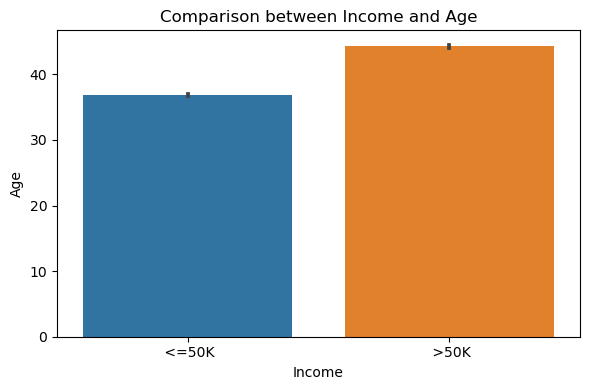

In [21]:
plt.figure(figsize=(6,4))
plt.title("Comparison between Income and Age")
sns.barplot(df['Income'],df['Age'],data = df)
plt.xlabel("Income")
plt.ylabel("Age")
plt.tight_layout()

<AxesSubplot:xlabel='Fnlwgt', ylabel='Income'>

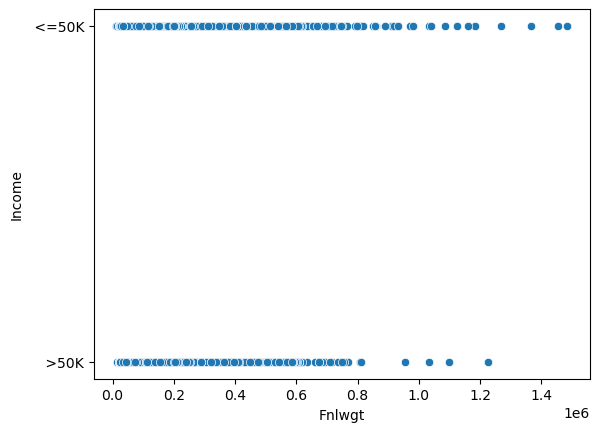

In [22]:
sns.scatterplot(df['Fnlwgt'],df['Income'])

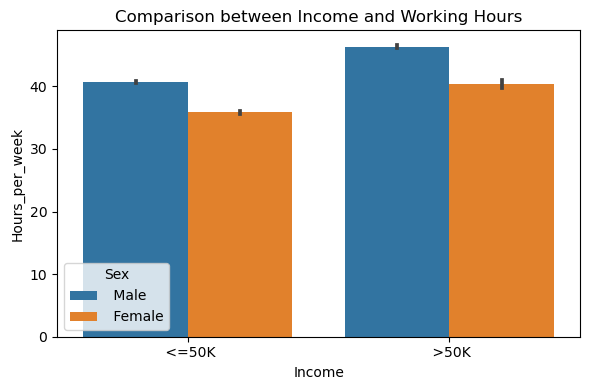

In [24]:
plt.figure(figsize=(6,4))
plt.title("Comparison between Income and Working Hours")
sns.barplot(df['Income'],df['Hours_per_week'],hue='Sex',data = df)
plt.xlabel("Income")
plt.ylabel("Hours_per_week")
plt.tight_layout()


<AxesSubplot:xlabel='Fnlwgt', ylabel='Hours_per_week'>

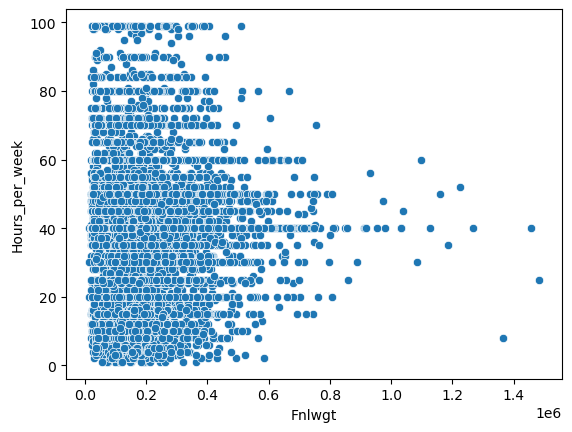

In [25]:
sns.scatterplot(df['Fnlwgt'],df['Hours_per_week'])

<AxesSubplot:xlabel='Age', ylabel='Hours_per_week'>

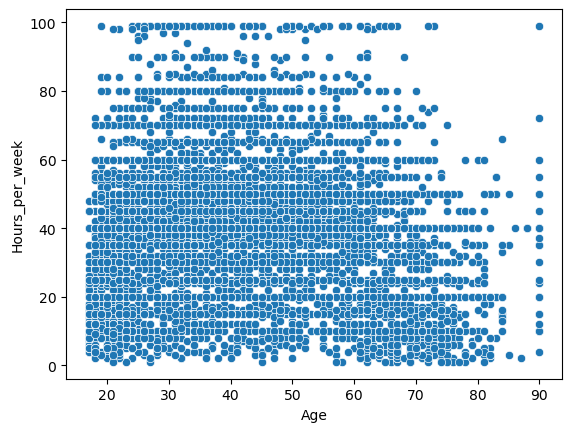

In [26]:
sns.scatterplot(df['Age'],df['Hours_per_week'])

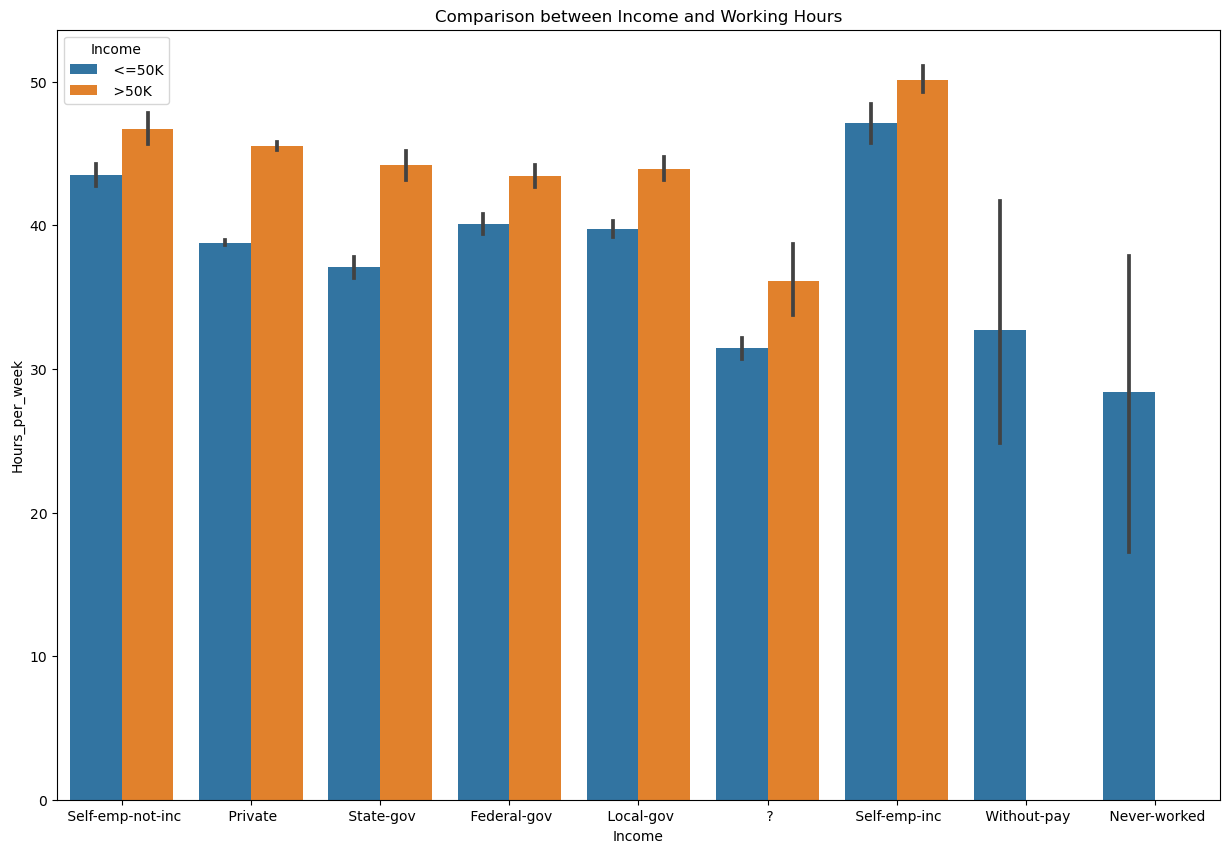

In [27]:
plt.figure(figsize=(15,10))
plt.title("Comparison between Income and Working Hours")
sns.barplot(df['Workclass'],df['Hours_per_week'],hue='Income',data = df)
plt.xlabel("Income")
plt.ylabel("Hours_per_week")
plt.show()

<Figure size 1000x1000 with 0 Axes>

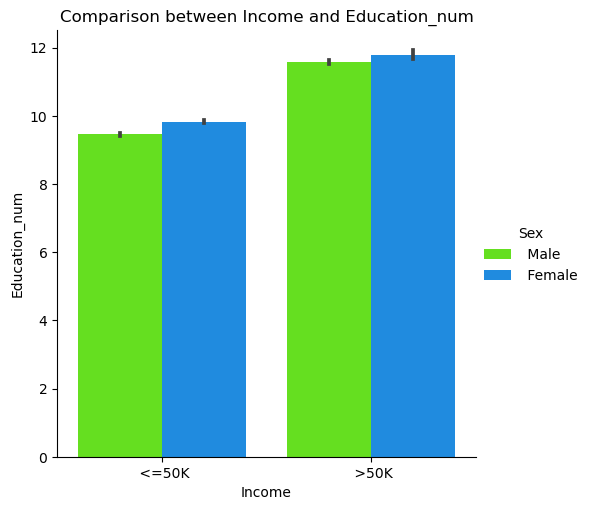

In [28]:
# Visualizing the number of Education with income
plt.figure(figsize=(10,10))
sns.catplot(x='Income',y='Education_num',data=df,kind='bar',hue="Sex",palette="gist_rainbow")
plt.title('Comparison between Income and Education_num')
plt.show()

<Figure size 1000x1000 with 0 Axes>

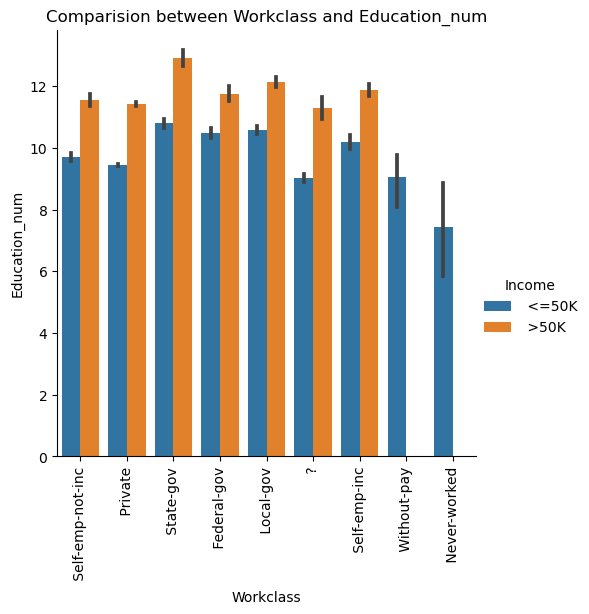

In [29]:
# Visualizing how the income changes with work class of the people
plt.figure(figsize=(10,10))
sns.catplot(x='Workclass',y='Education_num', data=df,kind='bar',hue="Income");
plt.title('Comparision between Workclass and Education_num')
plt.xticks(rotation=90)
plt.show()

<Figure size 1000x1000 with 0 Axes>

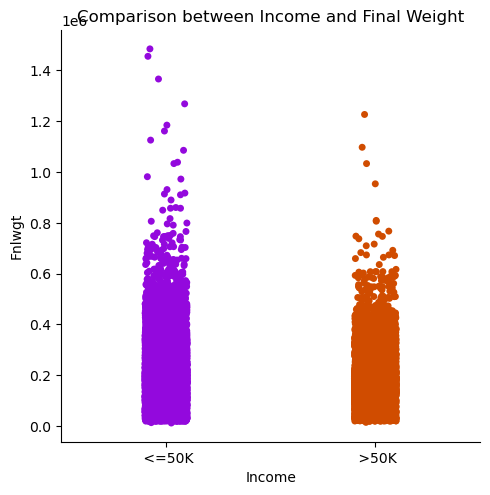

In [30]:
# Visualizing the Final Weight of the person who have more income
plt.figure(figsize=(10,10))
sns.catplot(x='Income',y='Fnlwgt',data=df,kind='strip',palette="gnuplot")
plt.title('Comparison between Income and Final Weight')
plt.show()

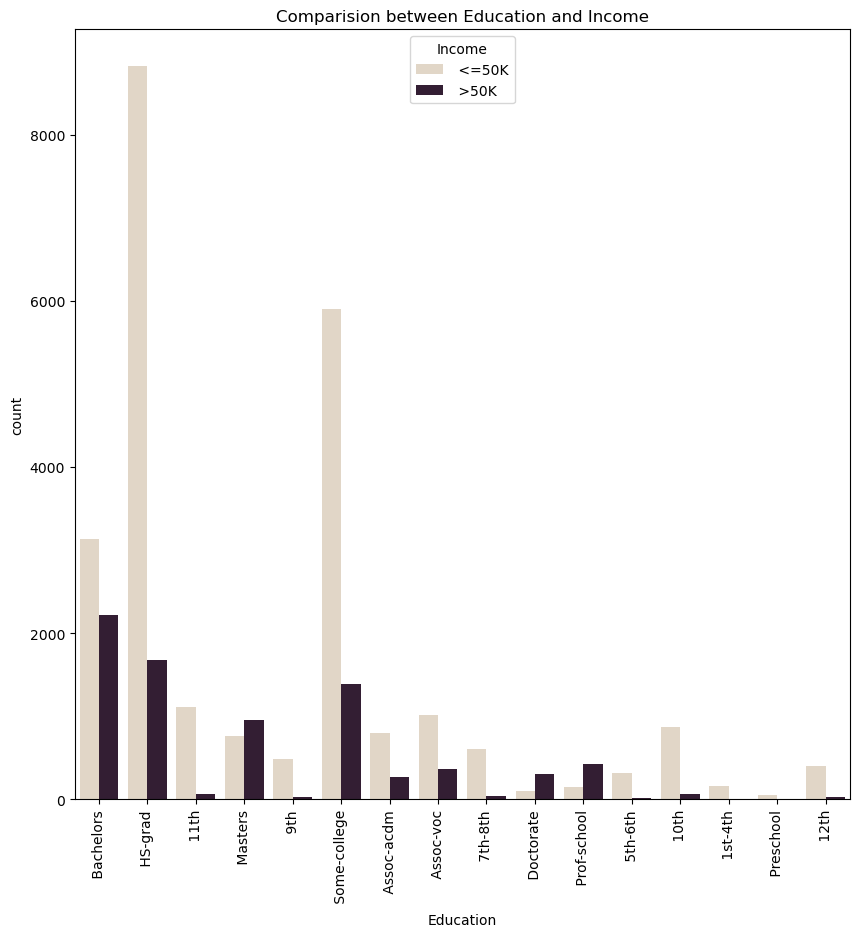

In [31]:
# Visualizing the relation between Education and Income of the people
plt.figure(figsize=(10,10))
sns.countplot(df["Education"],hue=df["Income"],palette='ch:.25')
plt.title("Comparision between Education and Income")
plt.xticks(rotation=90)
plt.show()

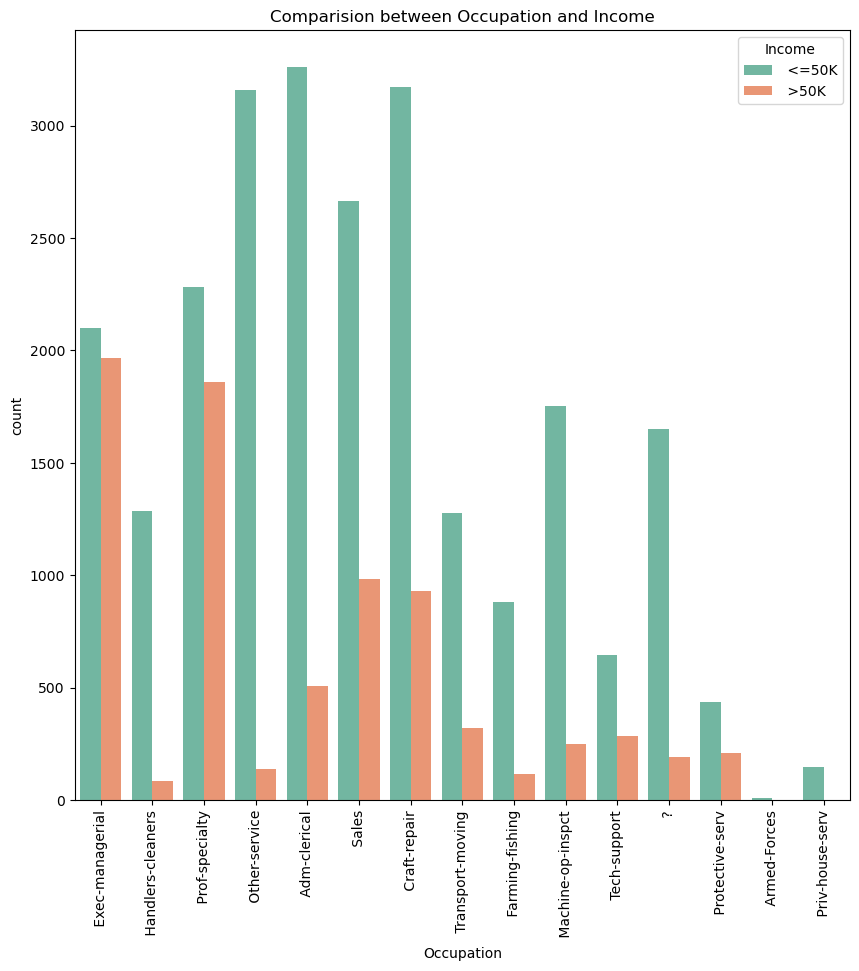

In [32]:
# Visualizing the relation between Occupation and Income of the people
plt.figure(figsize=(10,10))
sns.countplot(df["Occupation"],hue=df["Income"],palette='Set2')
plt.title("Comparision between Occupation and Income")
plt.xticks(rotation=90)
plt.show()

# Checking for '? ' in columns

In [33]:
df['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [34]:
df['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [35]:
df['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [36]:
df['Occupation']=df['Occupation'].replace('?',df['Occupation'].mode()[0])

In [37]:
df['Workclass']=df['Workclass'].replace('?',df['Workclass'].mode()[0])

In [38]:
df['Native_country']=df['Native_country'].replace('?',df['Native_country'].mode()[0])

We can observe that there was '?' in columns ('Occupation' ,'Workclass', 'Native_country') so replaced it with the mode value of that particuar column

# Now using encoder to encode the target variable

In [39]:
Cat_col.remove("Education")

In [40]:
from sklearn.preprocessing import LabelEncoder

enc=LabelEncoder()

In [41]:
for i in Cat_col:
    df[i]=enc.fit_transform(df[i])

In [42]:
df.dtypes

Age                int64
Workclass          int32
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status     int32
Occupation         int32
Relationship       int32
Race               int32
Sex                int32
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country     int32
Income             int32
dtype: object

In [43]:
df['Education'].nunique()

16

We will encode Education column using ordinal enocder as it follows some order.

In [44]:
education=[' Preschool',' 1st-4th',' 5th-6th',' 7th-8th',' 9th',' 10th',' 11th',' 12th',' HS-grad',' Prof-school',' Some-college',' Assoc-acdm',' Assoc-voc',' Bachelors',' Masters',' Doctorate']


In [45]:
education.reverse()
education

[' Doctorate',
 ' Masters',
 ' Bachelors',
 ' Assoc-voc',
 ' Assoc-acdm',
 ' Some-college',
 ' Prof-school',
 ' HS-grad',
 ' 12th',
 ' 11th',
 ' 10th',
 ' 9th',
 ' 7th-8th',
 ' 5th-6th',
 ' 1st-4th',
 ' Preschool']

In [46]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder(categories=[education])

In [47]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [48]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,2.0,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,7.0,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,9.0,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,2.0,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,1.0,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,4.0,12,2,13,5,4,0,0,0,38,39,0
32556,40,4,154374,7.0,9,2,7,0,4,1,0,0,40,39,1
32557,58,4,151910,7.0,9,6,1,4,4,0,0,0,40,39,0
32558,22,4,201490,7.0,9,4,1,3,4,1,0,0,20,39,0


We can see that all categorical columns are converted into numerical.

# Checking for Corrrelation

# Plotting heatmap

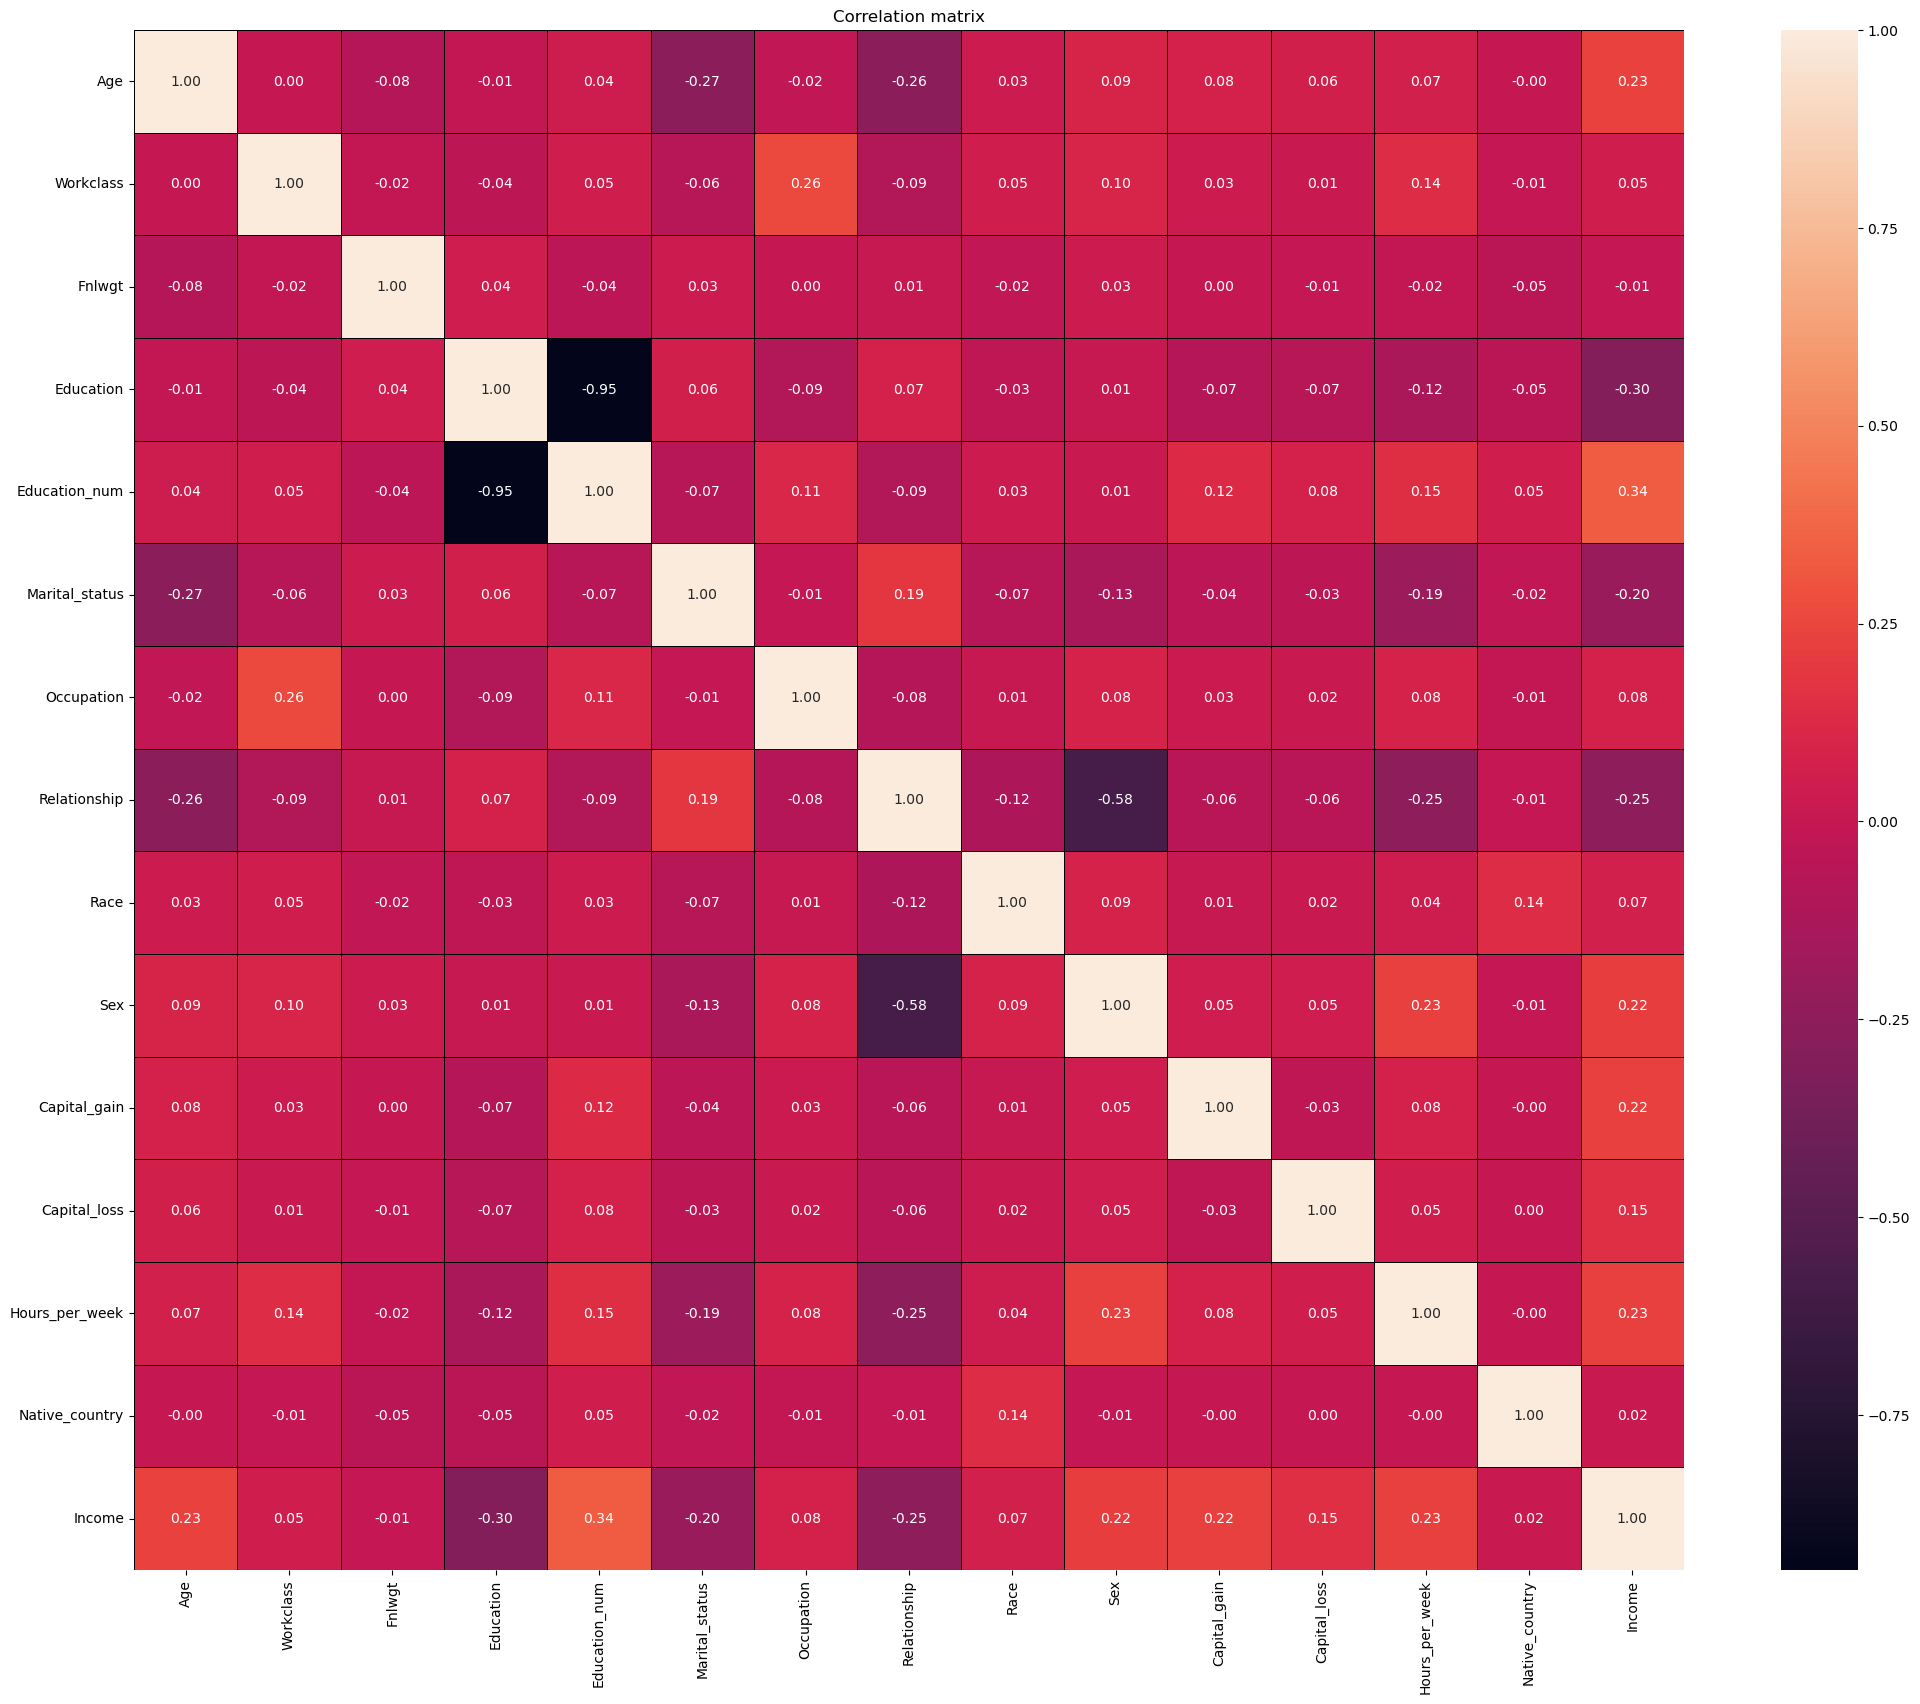

In [49]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor='black',fmt='.2f')
plt.title("Correlation matrix")
plt.savefig('Correlation matrix.jpg')
plt.show()

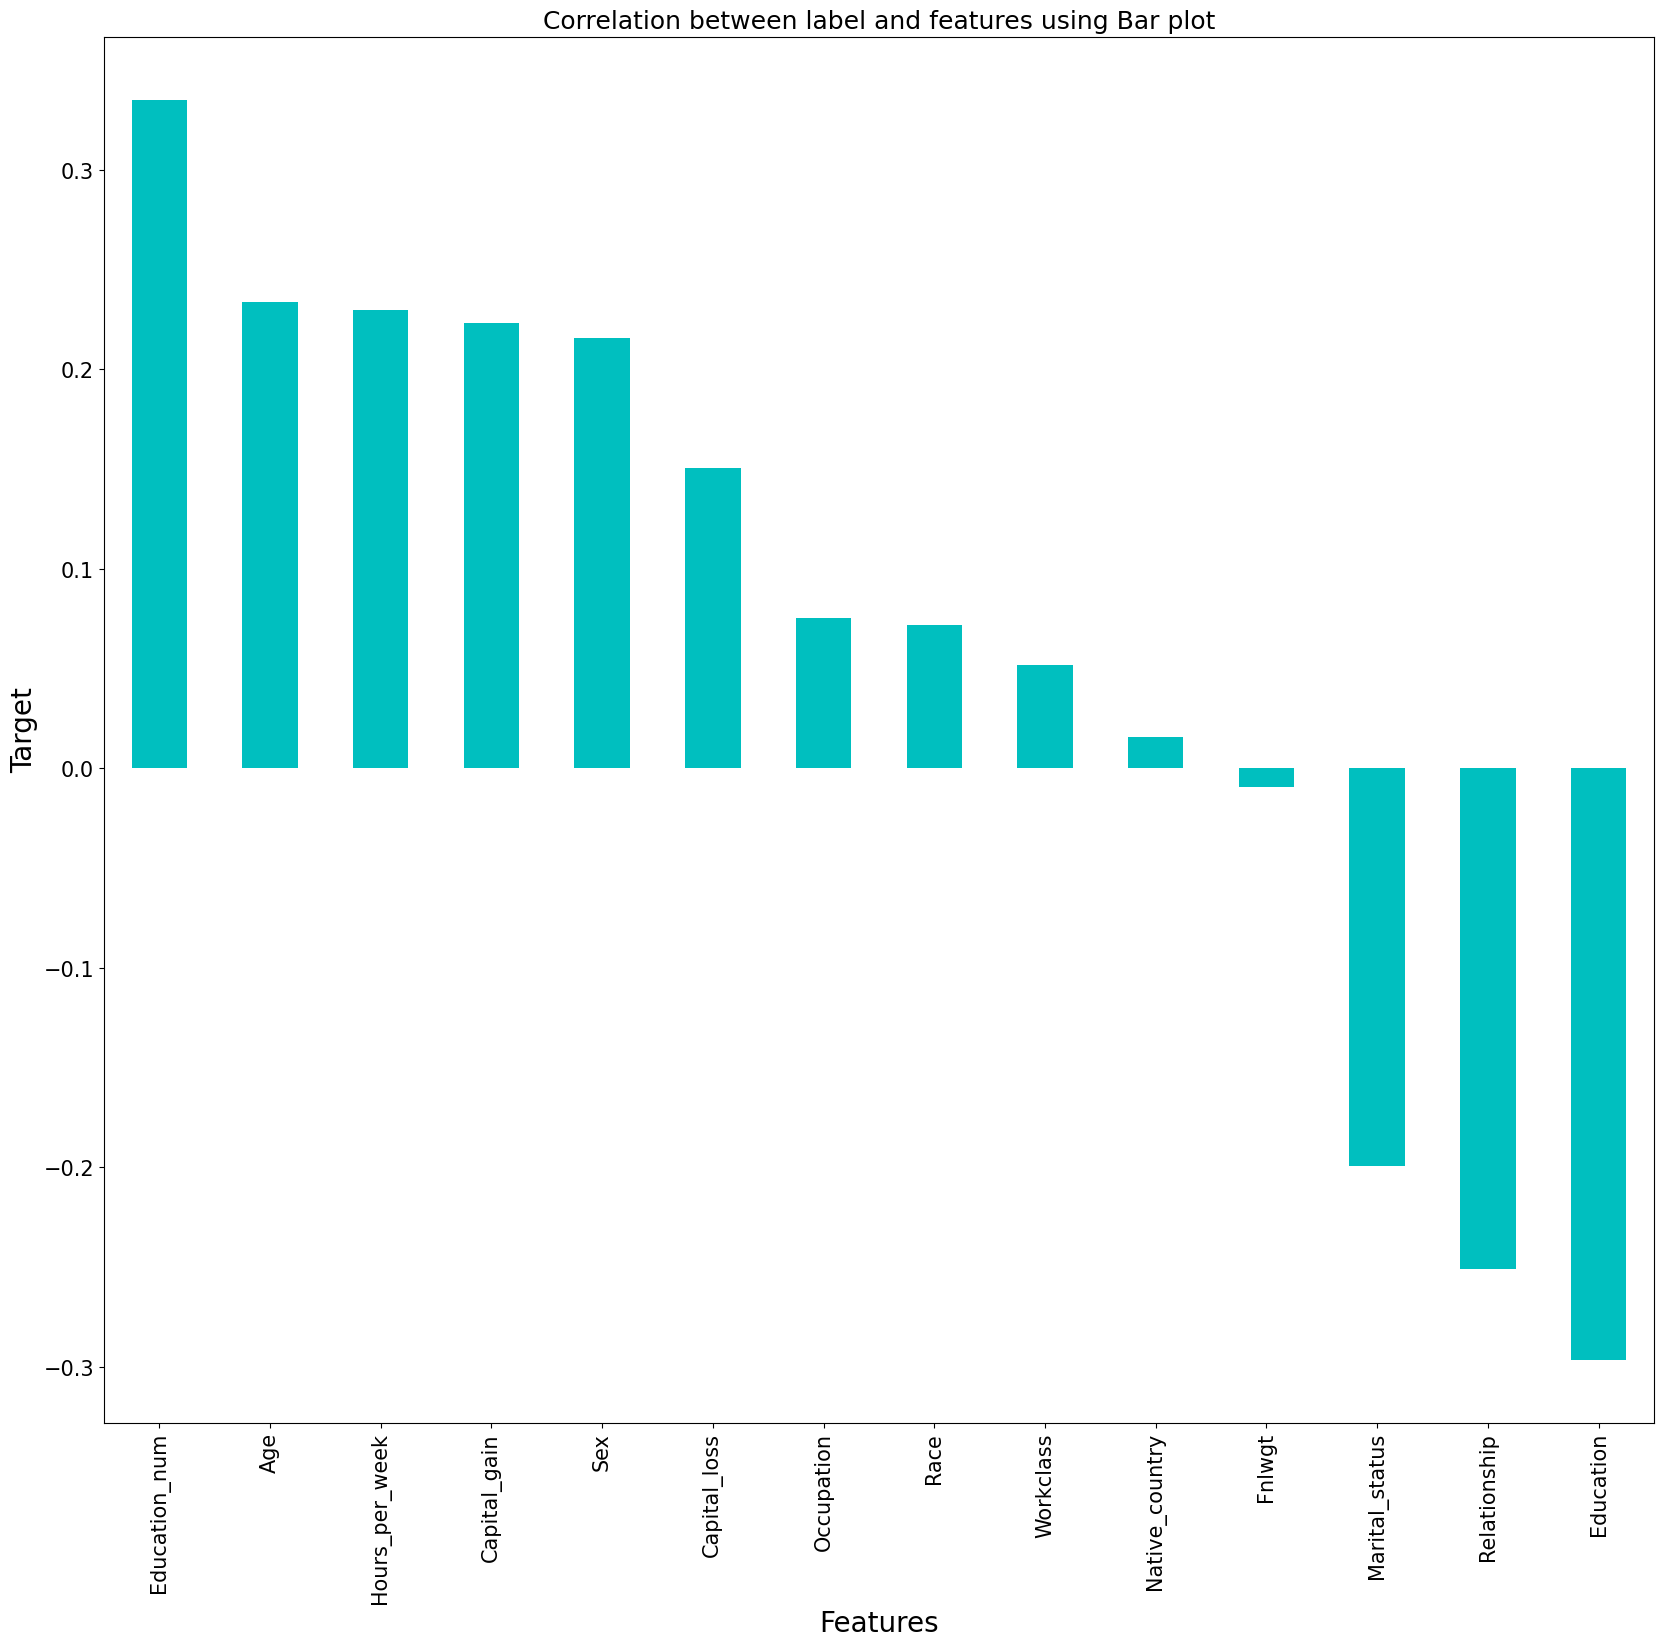

In [50]:
plt.figure(figsize=(20,18))
df.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar',color='c',fontsize=15)
plt.xlabel('Features',fontsize=20)
plt.ylabel('Target',fontsize=20)
plt.title('Correlation between label and features using Bar plot',fontsize=18)
plt.show()

In [51]:
df=df.drop(columns=['Fnlwgt','Native_country'],axis=1)

# Checking Skewness

In [52]:
df_cont.skew()

Age                0.558738
Fnlwgt             1.446972
Education_num     -0.311630
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
dtype: float64

We can observe that columns ['Capital_gain','Capital_loss'] are highly skewed.

Setting skewness limit to -0.65to +0.65

# Checking for Outliers

In [53]:
df_cont.shape

(32560, 6)

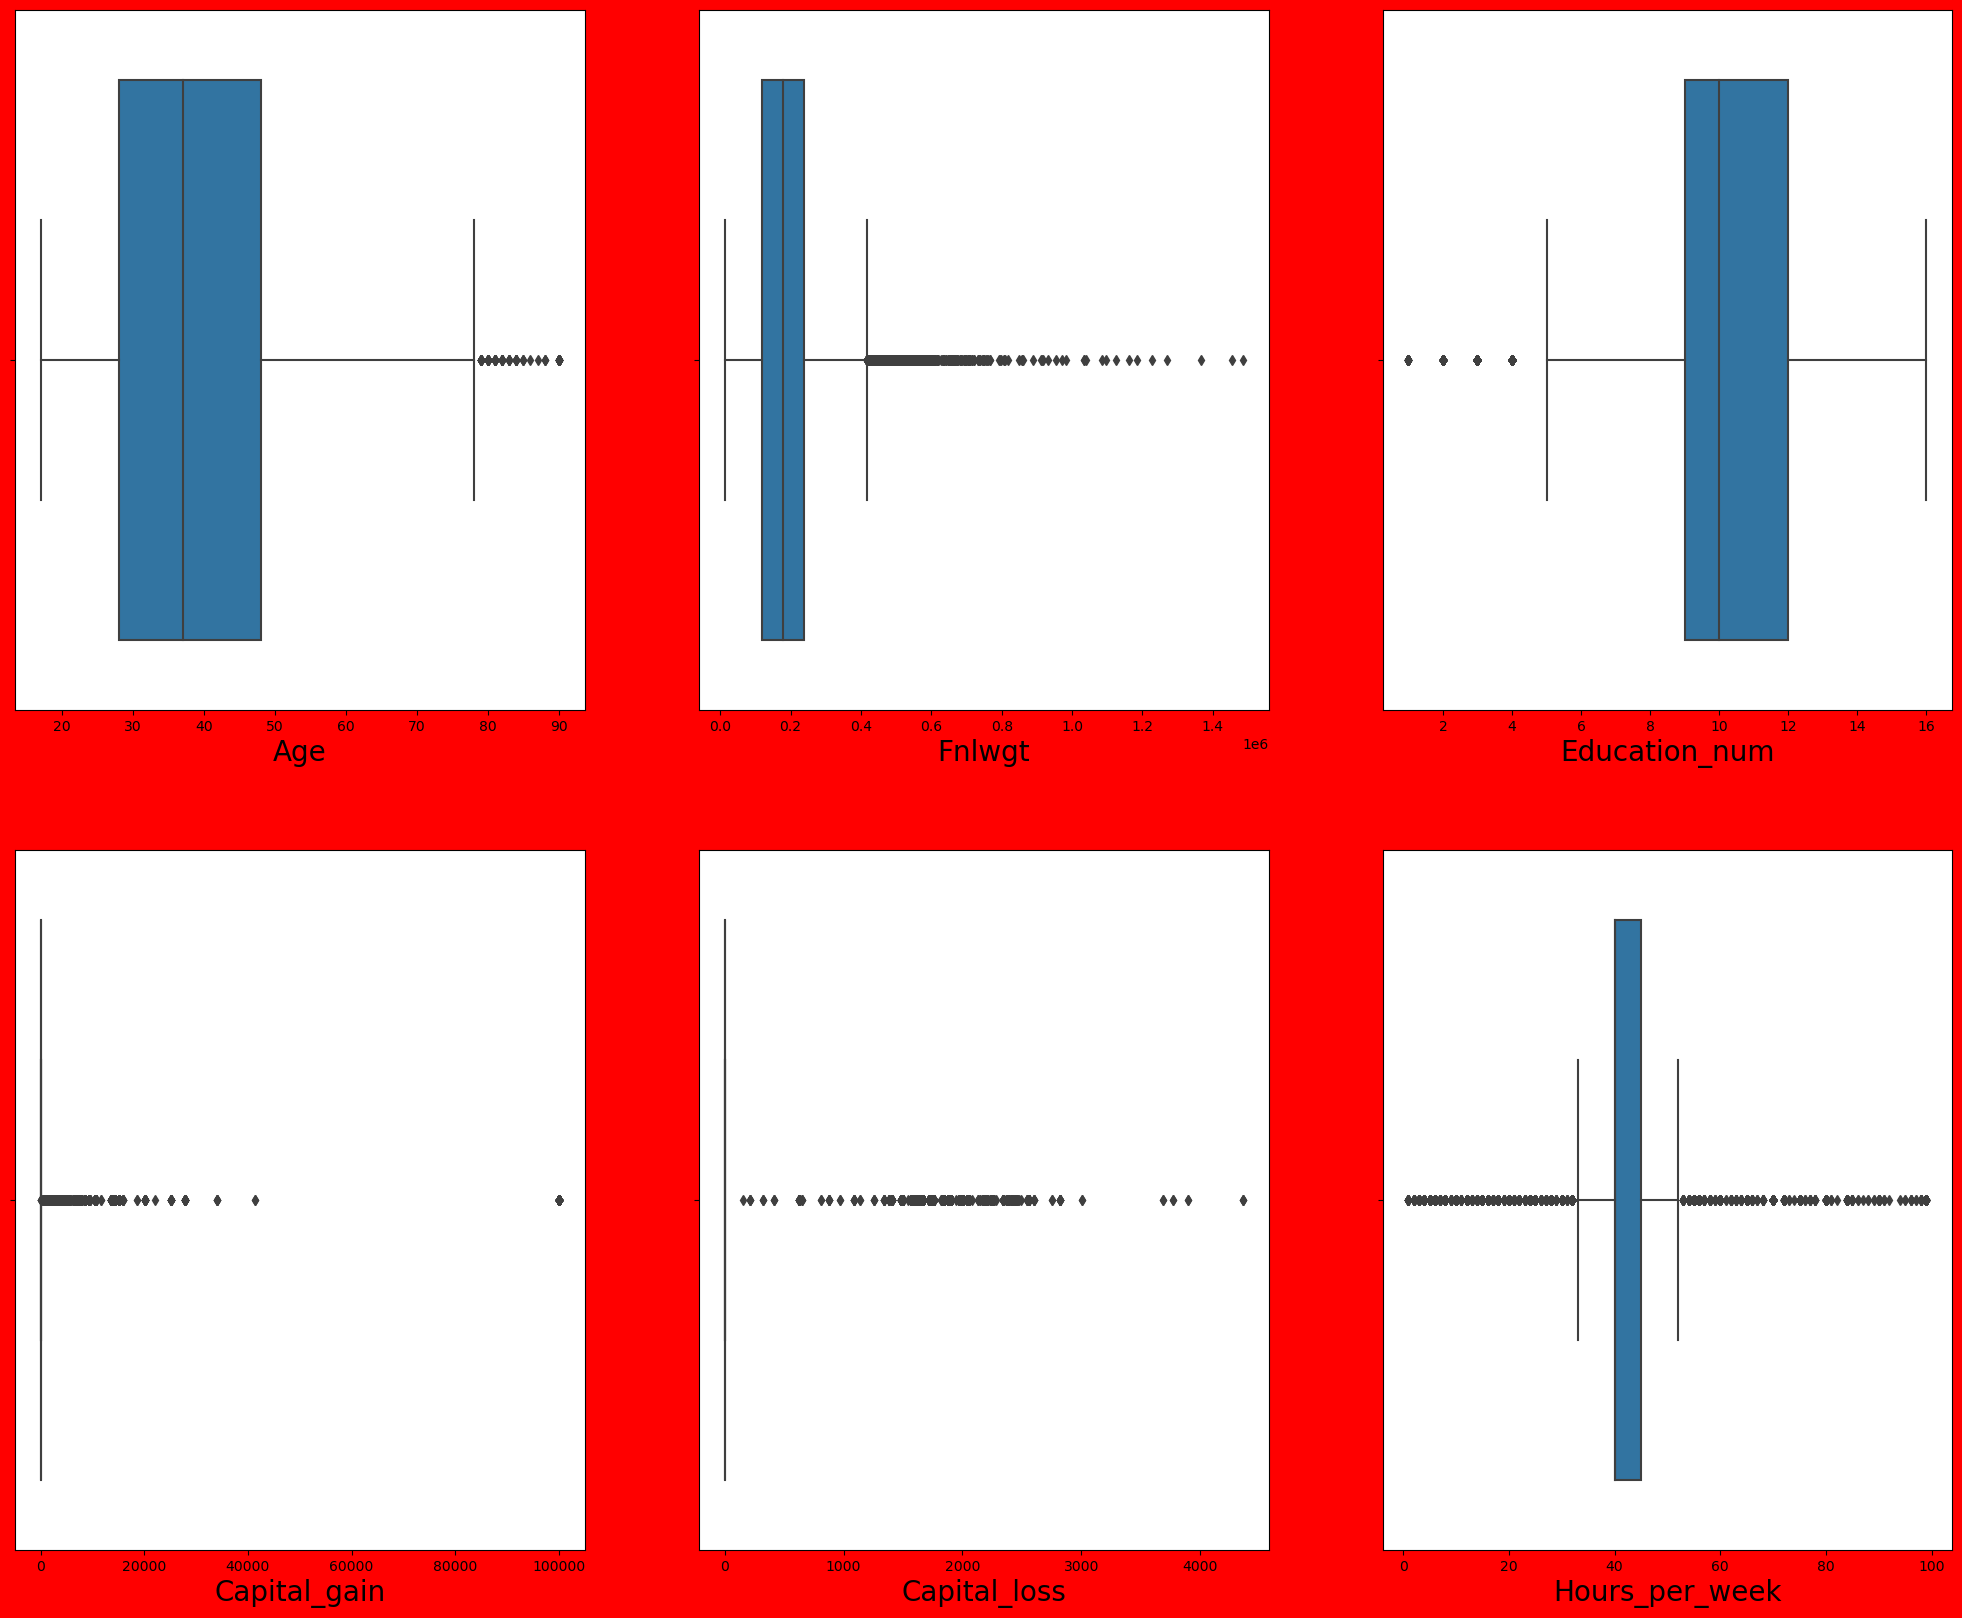

In [54]:
plt.figure(figsize=(25,20),facecolor= 'red')
plotnumber = 1


for column in df_cont:
    if plotnumber<=6:
        plt.subplot(2,3,plotnumber)
        ax=sns.boxplot(df_cont[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

We can observe that all columns are having outliers in it.

# Data Preprocessing

# Removing Outliers using Z-technique

In [55]:
num_col.remove('Fnlwgt')

In [56]:
from scipy.stats import zscore
z=np.abs(zscore(df[num_col]))
z.shape
z

,Age,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,0.837097,1.134779,0.145914,0.216663,2.222120
1,0.042640,0.420027,0.145914,0.216663,0.035430
2,1.057031,1.197429,0.145914,0.216663,0.035430
3,0.775755,1.134779,0.145914,0.216663,0.035430
4,0.115952,1.523480,0.145914,0.216663,0.035430
...,...,...,...,...,...
32555,0.849066,0.746077,0.145914,0.216663,0.197407
32556,0.103982,0.420027,0.145914,0.216663,0.035430
32557,1.423589,0.420027,0.145914,0.216663,0.035430
32558,1.215624,0.420027,0.145914,0.216663,1.655200


In [57]:
df_new=df[(z<3).all(axis=1)]
print("old dataframe",df.shape)
print("new dataframe",df_new.shape)
print("total number of rows dropped",df.shape[0]-df_new.shape[0])

old dataframe (32560, 13)
new dataframe (30150, 13)
total number of rows dropped 2410


# Percentage data loss

In [58]:
loss_percent=(32560-30150)/32560*100
loss_percent

7.401719901719901

# Seperating features and target variable as x and y

In [59]:
x=df_new.drop(columns=['Income'],axis=1)
y=df_new['Income']

In [60]:
x.shape

(30150, 12)

In [61]:
y.shape

(30150,)

# Handling imbalanced dataset

In [62]:
y.value_counts()

0    23424
1     6726
Name: Income, dtype: int64

Since target variable is imbalanced and size of dataset is small so we will do oversampling.

# Over sampling using SMOTE

In [63]:
import sys
from collections import Counter
import joblib
import six
from sklearn.model_selection import train_test_split
sys.modules['sklearn.externals.six']=six
sys.modules['sklearn.externals.joblib']=joblib
from sklearn.model_selection import train_test_split

In [64]:
from imblearn.over_sampling import SMOTE

In [67]:
over_smpl=SMOTE(sampling_strategy=0.8)
x,y=over_smpl.fit_resample(x,y)

In [68]:
y.value_counts()

0    23424
1    18739
Name: Income, dtype: int64

# Removing skewness using data transforamtion

In [69]:
x.skew()

Age                0.349448
Workclass         -0.768547
Education          0.307992
Education_num     -0.228067
Marital_status     0.244030
Occupation         0.089568
Relationship       1.066344
Race              -2.595232
Sex               -0.908107
Capital_gain       3.517609
Capital_loss      35.282410
Hours_per_week    -0.371339
dtype: float64

In [70]:
from sklearn.preprocessing import power_transform

x_new=power_transform(x,method='yeo-johnson')
x_new

array([[ 0.83758625,  1.77505793, -1.12678344, ..., -0.36846283,
        -0.03375998, -2.36607058],
       [-0.04078635,  0.03749567,  0.75511869, ..., -0.36846283,
        -0.03375998, -0.16200286],
       [ 1.03771712,  0.03749567,  1.36405736, ..., -0.36846283,
        -0.03375998, -0.16200286],
       ...,
       [ 0.1156322 ,  1.77505793, -1.12678344, ..., -0.36846283,
        -0.03375998,  0.31857592],
       [ 1.41929637,  0.03749567, -1.12678344, ..., -0.36846283,
        -0.03375998, -0.44118328],
       [ 0.55971994,  0.03749567, -0.70666521, ..., -0.36846283,
        -0.03375998, -0.16200286]])

In [71]:
x=pd.DataFrame(x_new,columns=x.columns)

In [72]:
x.skew()

Age               -0.030993
Workclass          0.098293
Education         -0.085785
Education_num     -0.001411
Marital_status    -0.020722
Occupation        -0.182819
Relationship       0.322733
Race              -2.093221
Sex               -0.908107
Capital_gain       2.345599
Capital_loss      29.588161
Hours_per_week     0.128074
dtype: float64

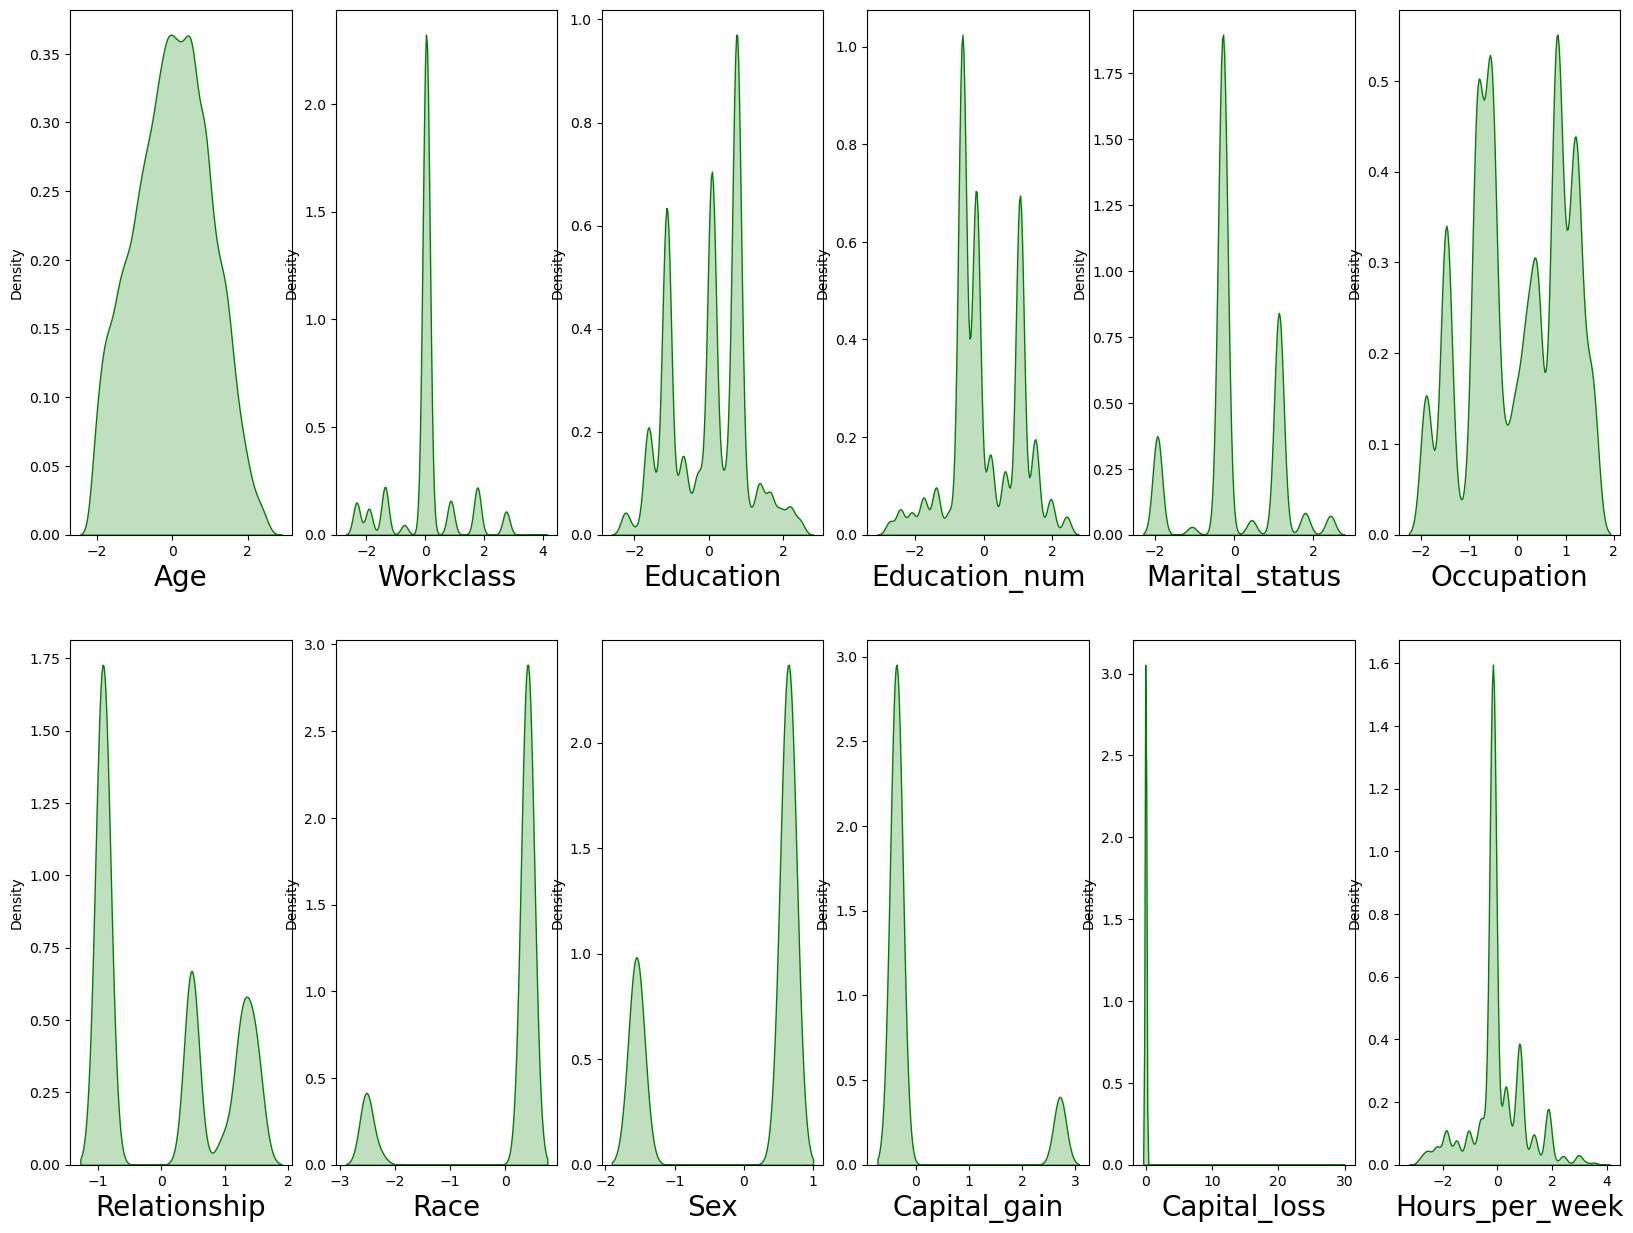

In [73]:
#Lets check the distribution of continous columns after datatransformation
plt.figure(figsize=(20,15), facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber<=12:
        ax = plt.subplot(2,6,plotnumber)
        sns.distplot(x[column],color='green',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show() 

In [74]:
x=x.drop(columns=['Capital_loss','Capital_gain'],axis=1)

We have dropped above columns because they are highly skewed after removing skewness.

# Data Standardisation

In [76]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week
0,0.837586,1.775058,-1.126783,1.061197,-0.285355,-0.545285,-0.923174,0.401276,0.644211,-2.366071
1,-0.040786,0.037496,0.755119,-0.618822,-1.933634,-0.045564,0.475709,0.401276,0.644211,-0.162003
2,1.037717,0.037496,1.364057,-1.387775,-0.285355,-0.045564,-0.923174,-2.516973,0.644211,-0.162003
3,-0.903693,0.037496,-1.126783,1.061197,-0.285355,0.817529,1.541379,-2.516973,-1.552286,-0.162003
4,-0.120758,0.037496,-1.630822,1.506931,-0.285355,-0.545285,1.541379,0.401276,-1.552286,-0.162003
...,...,...,...,...,...,...,...,...,...,...
42158,-0.284477,0.868112,0.609383,-0.618822,-0.285355,-0.822552,-0.923174,-2.281864,0.644211,1.863059
42159,0.037995,0.037496,0.755119,-0.618822,-0.285355,-0.545285,-0.923174,0.401276,0.644211,1.863059
42160,0.115632,1.775058,-1.126783,1.061197,-0.285355,0.817529,-0.923174,0.401276,0.644211,0.318576
42161,1.419296,0.037496,-1.126783,1.061197,-0.285355,1.204511,-0.923174,0.401276,0.644211,-0.441183


# Check for multicollinearity

In [77]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['vif1']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif['features']=x.columns
vif

,vif1,features
0,1.257821,Age
1,1.066065,Workclass
2,7.096453,Education
3,7.183791,Education_num
4,1.170051,Marital_status
5,1.083767,Occupation
6,2.204024,Relationship
7,1.023123,Race
8,1.832469,Sex
9,1.161439,Hours_per_week


In [78]:
x=x.drop(columns=['Education'],axis=1)

Dropping column('Education') and checking the multicollinearity again.

In [79]:
vif=pd.DataFrame()
vif['vif1']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif['features']=x.columns
vif

,vif1,features
0,1.257466,Age
1,1.064852,Workclass
2,1.073411,Education_num
3,1.169951,Marital_status
4,1.083012,Occupation
5,2.203044,Relationship
6,1.023081,Race
7,1.831364,Sex
8,1.161403,Hours_per_week


We can see that VIF value is less than 5 for all columns .So there is no multicollinearity.

# Model Training and Building

# Support Vector Machine

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,roc_curve

# Finding the best random state

In [82]:
max_acc=0
max_rs=0

for i in range(0,20):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    svm=SVC()
    svm.fit(x_train,y_train)
    pred_svm=svm.predict(x_test)
    accuracy=accuracy_score(y_test,pred_svm)
    print('Testing accuracy', accuracy,'random state',i)
    
    if accuracy>max_acc:
        max_acc=accuracy
        max_rs=i
        print('max_accuracy',max_acc,'max_random_state',i)
        

Testing accuracy 0.8135894699395233 random state 0
max_accuracy 0.8135894699395233 max_random_state 0
Testing accuracy 0.8153681963713981 random state 1
max_accuracy 0.8153681963713981 max_random_state 1
Testing accuracy 0.8171469228032728 random state 2
max_accuracy 0.8171469228032728 max_random_state 2
Testing accuracy 0.8128779793667734 random state 3
Testing accuracy 0.807897545357524 random state 4
Testing accuracy 0.823787501482272 random state 5
max_accuracy 0.823787501482272 max_random_state 5
Testing accuracy 0.8172655045653978 random state 6
Testing accuracy 0.8190442309972726 random state 7
Testing accuracy 0.8192813945215226 random state 8
Testing accuracy 0.8134708881773983 random state 9
Testing accuracy 0.8210601209533974 random state 10
Testing accuracy 0.8185699039487727 random state 11
Testing accuracy 0.8113364164591486 random state 12
Testing accuracy 0.8141823787501482 random state 13
Testing accuracy 0.8180955769002728 random state 14
Testing accuracy 0.8180955769

In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=14,test_size=0.20)

In [85]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print(f"Accuracy score in training:{accuracy_score(y_train,y_pred)*100:2f}%")
        
    elif train==False:
        pred=clf.predict(x_test)
        print(f"Accuracy score in testing:{accuracy_score(y_test,pred)*100:2f}%")
        
        print("Classification report\n",classification_report(y_test,pred,digits=2))

In [86]:
svm.fit(x_train,y_train)

SVC()

In [87]:
metric_score(svm,x_train,x_test,y_train,y_test,train=True)

Accuracy score in training:81.867773%


In [88]:
metric_score(svm,x_train,x_test,y_train,y_test,train=False)

Accuracy score in testing:81.809558%
Classification report
               precision    recall  f1-score   support

           0       0.86      0.80      0.83      4642
           1       0.77      0.84      0.81      3791

    accuracy                           0.82      8433
   macro avg       0.82      0.82      0.82      8433
weighted avg       0.82      0.82      0.82      8433



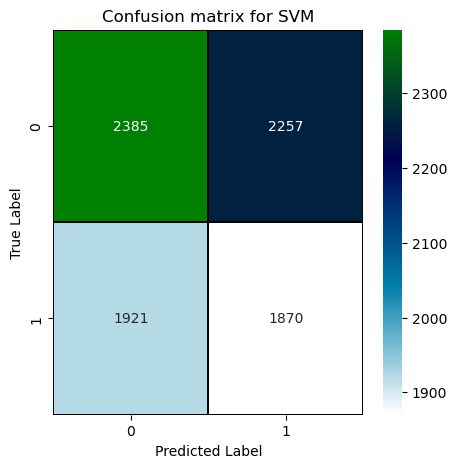

In [89]:
# Lets plot confusion matrix for SVM
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(y_test,pred_svm)
x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]
f , ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=.2,linecolor="black",fmt=".0f",ax=ax,cmap="ocean_r",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix for SVM")
plt.show()

# X-Gradient Boosting

In [92]:
import xgboost as xgb

xgb=xgb.XGBClassifier()

xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [93]:
metric_score(xgb,x_train,x_test,y_train,y_test,train=True)

Accuracy score in training:87.195375%


In [94]:
metric_score(xgb,x_train,x_test,y_train,y_test,train=False)

Accuracy score in testing:84.287917%
Classification report
               precision    recall  f1-score   support

           0       0.87      0.84      0.85      4642
           1       0.81      0.85      0.83      3791

    accuracy                           0.84      8433
   macro avg       0.84      0.84      0.84      8433
weighted avg       0.84      0.84      0.84      8433



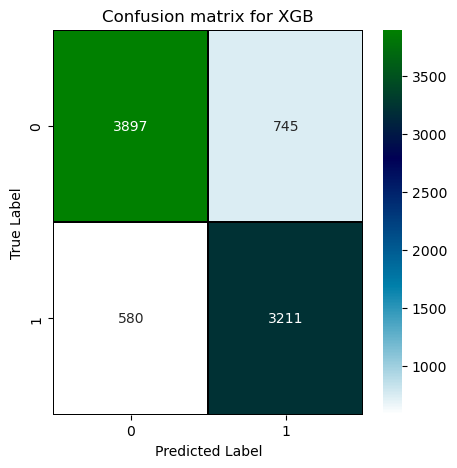

In [95]:
# Lets plot confusion matrix for XGB
pred_xgb=xgb.predict(x_test)
conf_mat=confusion_matrix(y_test,pred_xgb)
x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]
f , ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=.2,linecolor="black",fmt=".0f",ax=ax,cmap="ocean_r",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix for XGB")
plt.show()

# Random Forest

In [96]:
from sklearn.ensemble import RandomForestClassifier

In [97]:
rf=RandomForestClassifier()

In [98]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [99]:
metric_score(rf,x_train,x_test,y_train,y_test,train=True)

Accuracy score in training:96.323747%


In [100]:
metric_score(rf,x_train,x_test,y_train,y_test,train=False)

Accuracy score in testing:85.461876%
Classification report
               precision    recall  f1-score   support

           0       0.87      0.86      0.87      4642
           1       0.83      0.85      0.84      3791

    accuracy                           0.85      8433
   macro avg       0.85      0.85      0.85      8433
weighted avg       0.85      0.85      0.85      8433



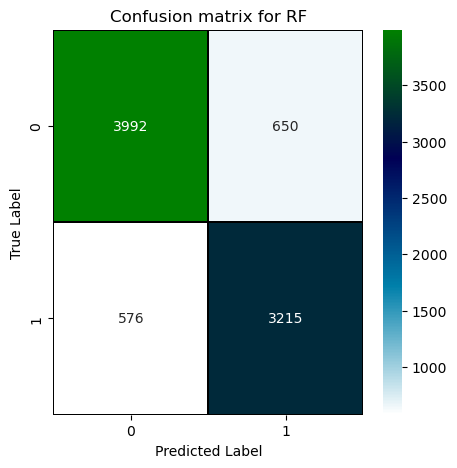

In [101]:
# Lets plot confusion matrix for RF
pred_rf=rf.predict(x_test)
conf_mat=confusion_matrix(y_test,pred_rf)
x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]
f , ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=.2,linecolor="black",fmt=".0f",ax=ax,cmap="ocean_r",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix for RF")
plt.show()

# K Nearest Neighbors(KNN)

In [102]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()

knn.fit(x_train,y_train)

KNeighborsClassifier()

In [103]:
metric_score(knn,x_train,x_test,y_train,y_test,train=True)

Accuracy score in training:87.619330%


In [104]:
metric_score(knn,x_train,x_test,y_train,y_test,train=False)

Accuracy score in testing:83.410411%
Classification report
               precision    recall  f1-score   support

           0       0.87      0.83      0.85      4642
           1       0.80      0.84      0.82      3791

    accuracy                           0.83      8433
   macro avg       0.83      0.83      0.83      8433
weighted avg       0.84      0.83      0.83      8433



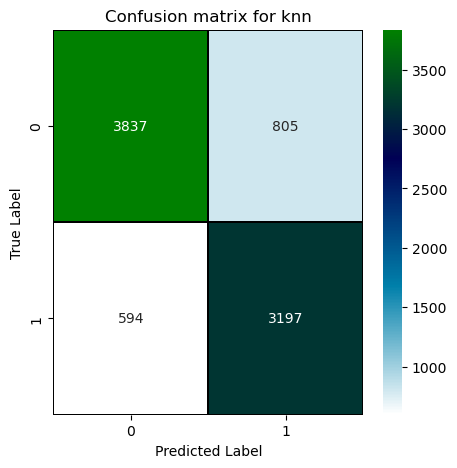

In [105]:
# Lets plot confusion matrix for KNN
pred_knn=knn.predict(x_test)
conf_mat=confusion_matrix(y_test,pred_knn)
x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]
f , ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=.2,linecolor="black",fmt=".0f",ax=ax,cmap="ocean_r",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix for knn")
plt.show()

# Cross Validation Score

In [106]:
from sklearn.model_selection import cross_val_score

In [107]:
lssscore_selected=cross_val_score(svm,x,y,cv=5).mean()
print("the cross validation score for SVM is ",lssscore_selected)

the cross validation score for SVM is  0.8145775800365016


In [108]:
lssscore_selected=cross_val_score(knn,x,y,cv=5).mean()
print("the cross validation score for KNN is ",lssscore_selected)

the cross validation score for KNN is  0.8255588587439199


In [109]:
lssscore_selected=cross_val_score(xgb,x,y,cv=5).mean()
print("the cross validation score for XGB is ",lssscore_selected)

the cross validation score for XGB is  0.8411888884838659


In [110]:
lssscore_selected=cross_val_score(rf,x,y,cv=5).mean()
print("the cross validation score for RF is ",lssscore_selected)

the cross validation score for RF is  0.849988144636448


# Conclusion

We can observe that at random state 14 and cv=5

SVM

------Testing Accuracy:82.26 and Cross val score:81.56--------

Random Forest

------Testing Accuracy:85.27 and Cross val score:84.94--------

KNN

------Testing Accuracy:83.64 and Cross val score:82.61--------

X-Gradient Boosting

------ Testing Accuracy:84.66 and Cross val score:84.46--------

# Plotting auc for all models

Text(0.5, 1.0, 'Recieving operating characterstics')

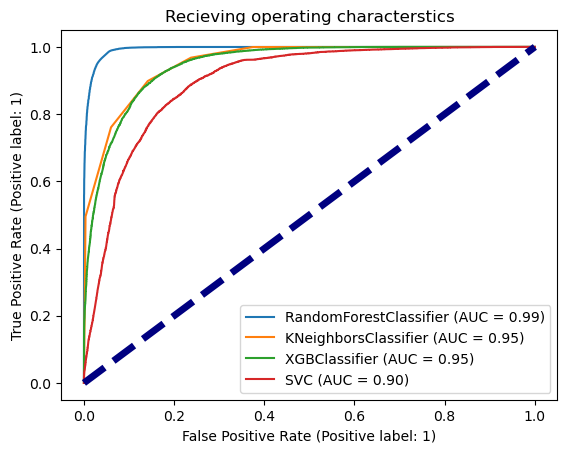

In [111]:
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve


disp=plot_roc_curve(rf,x_train,y_train)
plot_roc_curve(knn,x_train,y_train,ax=disp.ax_)
plot_roc_curve(xgb,x_train,y_train,ax=disp.ax_)
plot_roc_curve(svm,x_train,y_train,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.plot([0,1],[0,1],color='navy',lw=5,linestyle='--')
plt.title('Recieving operating characterstics')

We can say that Random Forest is the best model as it has highest testing accuracy and highest AUC score

# Hyperparameter Tuning

In [112]:
from sklearn.model_selection import GridSearchCV

In [113]:
# RandomForestClassifier
parameters = {'criterion':["gini","entropy"],
             'max_features':['auto','sqrt','log2'],
             'max_depth':[10,20,30,40,50],
             "min_samples_leaf":[2,3,4,5,6]}

In [114]:
grd=GridSearchCV(estimator=rf,param_grid=parameters,n_jobs=-1)

In [115]:
grd.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, 40, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 3, 4, 5, 6]})

In [116]:
print('best_parameters',grd.best_params_)

best_parameters {'criterion': 'entropy', 'max_depth': 50, 'max_features': 'log2', 'min_samples_leaf': 2}


In [117]:
rf=RandomForestClassifier(criterion='entropy',max_depth=40,max_features='auto',min_samples_leaf=2)

In [118]:
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=40, min_samples_leaf=2)

In [119]:
metric_score(rf,x_train,x_test,y_train,y_test,train=True)

Accuracy score in training:92.010080%


In [120]:
metric_score(rf,x_train,x_test,y_train,y_test,train=False)

Accuracy score in testing:85.438160%
Classification report
               precision    recall  f1-score   support

           0       0.88      0.85      0.87      4642
           1       0.83      0.86      0.84      3791

    accuracy                           0.85      8433
   macro avg       0.85      0.85      0.85      8433
weighted avg       0.86      0.85      0.85      8433



# Saving the best model

In [121]:
import pickle
pickle.dump(rf,open('classmodel_census','wb'))